<a href="https://colab.research.google.com/github/Imran012x/Transfer-Models/blob/main/Hilsha_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab-connect

In [19]:
from google.colab import drive
drive.mount('/content/drive')


# # Upload a file
# uploaded = files.upload()
# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


# import zipfile
# import os
# # with zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_224_11k.zip', 'r') as zip_ref:
# #     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_org_8407.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocess and Save

In [20]:
# import os
# import torch
# import numpy as np
# from PIL import Image
# from tqdm import tqdm
# import random
# import gc
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import threading
# import zipfile

# # Check GPU availability
# print("GPU Available:", torch.cuda.is_available())
# print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

# # Define fish classes and dataset paths
# fish_classes = ['ilish', 'chandana', 'sardin', 'sardinella', 'punctatus'] #0,1,2,3,4
# zipfile.ZipFile('/content/drive/MyDrive/Hilsha/data_fish_org_8407.zip').extractall('/content/.hidden_fish')
# data_dir = '/content/.hidden_fish'

# image_limits = {
#     'ilish': 3000,
#     'chandana': 1185,
#     'sardin': 2899,
#     'sardinella': 370,
#     'punctatus': 953
# }

# # Settings
# total_images = sum(image_limits.values())
# batch_size = 100
# num_threads = 4


# # Output paths
# output_dir = '/content/drive/MyDrive/Hilsha'
# os.makedirs(output_dir, exist_ok=True)
# labels_file = os.path.join(output_dir, 'Y_labels.npy')
# xdata_file = os.path.join(output_dir, 'X_data.npy')

# save_lock = threading.Lock()  # for thread-safe writes -> Prevents race conditions when multiple threads write to the same list.

# # Function to gather image paths
# def get_image_paths(class_name, max_images):
#     path = os.path.join(data_dir, class_name)
#     files = sorted(os.listdir(path))
#     random.shuffle(files)
#     return [os.path.join(path, f) for f in files[:max_images]]

# # Load and preprocess batch
# def load_and_preprocess_batch(image_paths, start_idx, batch_size, class_idx):
#     end_idx = min(start_idx + batch_size, len(image_paths))
#     batch_paths = image_paths[start_idx:end_idx]
#     batch_images = []

#     for img_path in batch_paths:
#         img = Image.open(img_path).resize((224, 224)).convert('RGB')
#         img_tensor = torch.tensor(np.array(img), dtype=torch.uint8).permute(2, 0, 1)  # C x H x W
#         batch_images.append(img_tensor)

#     batch_tensor = torch.stack(batch_images)  # B x C x H x W
#     batch_labels = np.full((len(batch_images),), class_idx, dtype=np.int32)
#     return batch_tensor, batch_labels

# # Process one batch and return tensors & labels (no file saving)
# def process_batch(image_paths, start_idx, batch_size, class_idx):
#     return load_and_preprocess_batch(image_paths, start_idx, batch_size, class_idx)

# def preprocess_and_save_all(overwrite=True):
#     if os.path.exists(labels_file) and os.path.exists(xdata_file) and not overwrite:
#         print("Preprocessed data already exists. Set overwrite=True to reprocess.")
#         return

#     all_images = []
#     all_labels = []
#     processed_count = 0

#     for idx, class_name in enumerate(fish_classes):
#         print(f"\nProcessing class: {class_name}")
#         image_paths = get_image_paths(class_name, image_limits[class_name])
#         total_batches = (len(image_paths) + batch_size - 1) // batch_size
#         #It ensures ceiling division — rounding up, not down.
#         # Normal division: 103 / 20 = 5.15 → floor division // 20 = 5 (❌ missing last 3 images)
#         # This trick: (103 + 20 - 1) // 20 = 122 // 20 = 6 ✅

#         with ThreadPoolExecutor(max_workers=num_threads) as executor:
#             futures = []
#             for start in range(0, len(image_paths), batch_size):
#                 futures.append(executor.submit(process_batch, image_paths, start, batch_size, idx))

#             for future in tqdm(as_completed(futures), total=total_batches, desc=class_name):#taqaddum (تقدّم) – Arabic for "progress".
#                 # futures: List of tasks (from ThreadPoolExecutor or ProcessPoolExecutor).
#                 # as_completed(futures): Yields each future as it finishes (not in order).

#                 batch_tensor, batch_labels = future.result()
#                 with save_lock: #Locks this section so that only one thread can update the shared lists safely.
#                     all_images.append(batch_tensor)
#                     all_labels.append(batch_labels)
#                     processed_count += batch_tensor.size(0)
#                     print(f"Processed batch with {batch_tensor.size(0)} images, total processed: {processed_count}/{total_images}")
#                 gc.collect()

#     # Combine all tensors and labels
#     X = torch.cat(all_images, dim=0).numpy()
#     Y = np.concatenate(all_labels, axis=0)

#     # Save final arrays
#     np.save(xdata_file, X, allow_pickle=False)#Malicious .npy -> import os;os.system("rm -rf /")  # ← Dangerous command
#     np.save(labels_file, Y, allow_pickle=False)

#     print(f"\n✅ Done! Saved {processed_count} images in {xdata_file}")
#     print(f"X_data shape: {X.shape}, Y_labels shape: {Y.shape}")

#     if processed_count != total_images:
#         raise ValueError(f"Expected {total_images} images, but processed {processed_count}")

# # Run preprocessing and save directly to X_data.npy and Y_labels.npy
# preprocess_and_save_all(overwrite=True)


####DATA LOADING....

In [21]:
import os
import numpy as np
import torch

# Your data path
output_dir = '/content/drive/MyDrive/Hilsha'
data_file = os.path.join(output_dir, 'X_data.npy')
labels_file = os.path.join(output_dir, 'Y_labels.npy')

# Readable size format
def sizeof_fmt(num, suffix='B'):
    for unit in ['', 'K', 'M', 'G', 'T']:
        if abs(num) < 1024.0:
            return f"{num:3.2f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.2f} T{suffix}"

# Main loader
def load_preprocessed_data(as_torch=True, normalize=True, to_device=None):
    # Check file existence #cpu,cuda (CUDA stands for Compute Unified Device Architecture.)
    for path in [data_file, labels_file]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Missing: {path}")

    # Print file sizes
    print(f"📁 X_data.npy: {sizeof_fmt(os.path.getsize(data_file))}")
    print(f"📁 Y_labels.npy: {sizeof_fmt(os.path.getsize(labels_file))}")

    # Load with mmap
    X = np.load(data_file, mmap_mode='r')
    Y = np.load(labels_file, mmap_mode='r')

    print(f"✅ X shape: {X.shape}, dtype: {X.dtype}")
    print(f"✅ Y shape: {Y.shape}, dtype: {Y.dtype}")

    # Sanity check
    if len(X) != len(Y):
        raise ValueError("Mismatch between number of samples in X and Y")

    # Convert to torch
    if as_torch:
        X = torch.from_numpy(X)
        Y = torch.from_numpy(Y)

        if normalize and X.dtype == torch.uint8:
            X = X.float() / 255.0

        if to_device:
            X = X.to(to_device)
            Y = Y.to(to_device)

        print(f"🧠 Torch tensors ready on {to_device or 'CPU'}")

    return X, Y

# 🔁 Example call
X, Y = load_preprocessed_data(
    as_torch=True,
    normalize=True,
    to_device='cuda' if torch.cuda.is_available() else 'cpu'
)

📁 X_data.npy: 1.18 GB
📁 Y_labels.npy: 32.96 KB
✅ X shape: (8407, 3, 224, 224), dtype: uint8
✅ Y shape: (8407,), dtype: int32
🧠 Torch tensors ready on cuda


In [22]:
# 1. IMPORTS AND INITIAL SETUP
# =============================================================================
# Purpose: Import all required libraries and set up warnings to suppress unnecessary messages.

import os
import sys
import warnings
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import cv2
from itertools import combinations
from tqdm import tqdm
import time
from datetime import datetime, timedelta

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.metrics import roc_curve, auc

# Machine Learning
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, f1_score,
                             accuracy_score, precision_score, recall_score)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Hyperparameter optimization
try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False
    print("Warning: Optuna not available. Using default hyperparameters.")

# XAI dependencies
import torch.autograd as autograd

warnings.filterwarnings("ignore")



In [23]:


# ---
# 2. CONFIGURATION
# =============================================================================
# Purpose: Define configuration settings and initialize the environment.

class Config:
    """Configuration settings"""
    # Paths - UPDATE THESE TO YOUR ACTUAL PATHS
    DATA_FILE = '/content/drive/MyDrive/Hilsha/X_data.npy'
    LABELS_FILE = '/content/drive/MyDrive/Hilsha/Y_labels.npy'
    OUTPUT_DIR = './fish_classification_results'

    # Dataset parameters
    NUM_CLASSES = 5
    CLASS_LABELS = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']
    INPUT_SIZE = 224

    # Training parameters
    BATCH_SIZE = 64
    EPOCHS = 1
    DATALOADER_NUM_WORKERS = 4
    PIN_MEMORY = True
    USE_MIXED_PRECISION = True
    COMPILE_MODEL = True
    PATIENCE = 10
    LEARNING_RATE = 1e-4
    WEIGHT_DECAY = 1e-4

    # Hyperparameter tuning
    OPTUNA_TRIALS = 2
    OPTUNA_EPOCHS = 3

    # Models to train
    MODELS = ['resnet50', 'efficientnet_b0', 'mobilenet_v3_large',
              'vgg16', 'densenet121']

    # Ensemble methods
    ENSEMBLE_METHODS = ['simple_average', 'weighted_average', 'confidence_based', 'learnable_weighted']

    # Device
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    SEED = 42

def setup_environment():
    """Setup random seeds and directories"""
    torch.manual_seed(Config.SEED)
    np.random.seed(Config.SEED)

    directories = [
        Config.OUTPUT_DIR,
        f"{Config.OUTPUT_DIR}/models",
        f"{Config.OUTPUT_DIR}/visualizations",
        f"{Config.OUTPUT_DIR}/reports",
        f"{Config.OUTPUT_DIR}/xai_visualizations"
    ]

    for directory in directories:
        Path(directory).mkdir(parents=True, exist_ok=True)

    print(f"Using device: {Config.DEVICE}")
    print(f"PyTorch version: {torch.__version__}")
    print("-" * 70)


In [24]:

# ---
# 3. TRAINING PROGRESS TRACKER
# =============================================================================
# Purpose: Track and display training progress with progress bars and epoch summaries.

class TrainingProgressTracker:
    """Track and display detailed training progress"""

    def __init__(self, model_name, total_epochs, total_batches_per_epoch):
        self.model_name = model_name
        self.total_epochs = total_epochs
        self.total_batches_per_epoch = total_batches_per_epoch
        self.start_time = time.time()
        self.epoch_start_time = None
        self.batch_times = []

    def start_epoch(self, epoch):
        """Start tracking an epoch"""
        self.current_epoch = epoch
        self.epoch_start_time = time.time()
        self.batch_times = []
        print(f"\n{'='*60}")
        print(f"Model: {self.model_name.upper()} | Epoch: {epoch+1}/{self.total_epochs}")
        print(f"{'='*60}")

    def update_batch(self, batch_idx, batch_loss, batch_acc, is_training=True):
        """Update progress for current batch"""
        batch_time = time.time()
        self.batch_times.append(batch_time)

        # Calculate timing estimates
        if len(self.batch_times) > 1:
            avg_batch_time = np.mean(np.diff(self.batch_times[-10:]))
        else:
            avg_batch_time = 1.0

        remaining_batches = self.total_batches_per_epoch - (batch_idx + 1)
        eta_epoch = remaining_batches * avg_batch_time

        # Progress bar
        progress_pct = (batch_idx + 1) / self.total_batches_per_epoch * 100
        bar_length = 30
        filled_length = int(bar_length * (batch_idx + 1) // self.total_batches_per_epoch)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)

        # Format time
        eta_str = str(timedelta(seconds=int(eta_epoch)))

        # Display progress
        mode = "TRAIN" if is_training else "VAL  "
        print(f"\r{mode} |{bar}| {progress_pct:5.1f}% | "
              f"Batch: {batch_idx+1:4d}/{self.total_batches_per_epoch} | "
              f"Loss: {batch_loss:.4f} | Acc: {batch_acc:.4f} | "
              f"ETA: {eta_str}", end='', flush=True)

    def finish_epoch(self, train_loss, train_acc, val_loss, val_acc, val_f1,
                    is_best=False, lr=None):
        """Finish epoch and display summary"""
        epoch_time = time.time() - self.epoch_start_time
        total_time = time.time() - self.start_time

        print(f"\n{'-'*60}")
        print(f"EPOCH SUMMARY:")
        print(f"  Train Loss: {train_loss:.6f} | Train Acc: {train_acc:.4f}")
        print(f"  Val Loss:   {val_loss:.6f} | Val Acc:   {val_acc:.4f}")
        print(f"  Val F1:     {val_f1:.4f} | Epoch Time: {epoch_time:.1f}s")
        if lr:
            print(f"  Learning Rate: {lr:.2e}")

        if is_best:
            print(f"  ★ NEW BEST MODEL! (F1: {val_f1:.4f})")

        print(f"  Total Time: {str(timedelta(seconds=int(total_time)))}")
        print(f"{'-'*60}")


In [25]:

# ---
# 4. DATA LOADING AND PREPROCESSING
# =============================================================================
# Purpose: Handle dataset creation, data loading, balancing with SMOTE, and data augmentation.

class FishDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = self._preprocess_images(images)
        self.labels = labels.astype(np.int64)
        self.transform = transform

    def _preprocess_images(self, images):
        if images.max() > 1.5:
            images = images.astype(np.float32) / 255.0
        if len(images.shape) == 4 and images.shape[1] == 3:
            images = np.transpose(images, (0, 2, 3, 1))
        return images.astype(np.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image=image)['image']
        else:
            image = torch.from_numpy(image).permute(2, 0, 1)

        return image, torch.tensor(label, dtype=torch.long)

class DataManager:
    @staticmethod
    def get_transforms(is_training=True, augmentation_strength='medium'):
        """Get data transforms with configurable augmentation strength"""
        if is_training:
            if augmentation_strength == 'light':
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.3),
                    A.RandomRotate90(p=0.3),
                    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ToTensorV2()
                ])
            elif augmentation_strength == 'heavy':
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.7),
                    A.VerticalFlip(p=0.5),
                    A.RandomRotate90(p=0.7),
                    A.ShiftScaleRotate(shift_limit=0.3, scale_limit=0.3, rotate_limit=45, p=0.8),
                    A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4, p=0.8),
                    A.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=40, val_shift_limit=30, p=0.7),
                    A.GaussianBlur(blur_limit=(3, 9), p=0.5),
                    A.GaussNoise(var_limit=(10.0, 80.0), p=0.4),
                    A.CoarseDropout(max_holes=12, max_height=25, max_width=25, p=0.5),
                    A.ElasticTransform(p=0.3),
                    A.GridDistortion(p=0.3),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ToTensorV2()
                ])
            else:  # medium
                return A.Compose([
                    A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                    A.HorizontalFlip(p=0.5),
                    A.VerticalFlip(p=0.3),
                    A.RandomRotate90(p=0.5),
                    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.7),
                    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
                    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.6),
                    A.GaussianBlur(blur_limit=(3, 7), p=0.4),
                    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
                    A.CoarseDropout(max_holes=8, max_height=20, max_width=20, p=0.4),
                    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ToTensorV2()
                ])
        else:
            return A.Compose([
                A.Resize(Config.INPUT_SIZE, Config.INPUT_SIZE),
                A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ToTensorV2()
            ])

    @staticmethod
    def load_and_balance_data():
        """Load data and apply SMOTE"""
        print("Loading and preprocessing data...")

        X = np.load(Config.DATA_FILE)
        Y = np.load(Config.LABELS_FILE)

        print(f"Original data shape: {X.shape}")
        print(f"Original class distribution: {np.bincount(Y)}")

        print("Applying SMOTE for class balancing...")
        X_flat = X.reshape(X.shape[0], -1)
        smote = SMOTE(random_state=Config.SEED, k_neighbors=min(5, np.bincount(Y).min()-1))
        X_balanced_flat, Y_balanced = smote.fit_resample(X_flat, Y)
        X_balanced = X_balanced_flat.reshape(-1, *X.shape[1:])

        print(f"Balanced data shape: {X_balanced.shape}")
        print(f"Balanced class distribution: {np.bincount(Y_balanced)}")

        return X_balanced, Y_balanced

    @staticmethod
    def create_data_loaders(X, Y, test_size=0.2, batch_size=None, augmentation_strength='medium'):
        if batch_size is None:
            if torch.cuda.is_available():
                gpu_memory_gb = torch.cuda.get_device_properties(0).total_memory / (1024**3)
                if gpu_memory_gb >= 24:
                    batch_size = 128
                elif gpu_memory_gb >= 12:
                    batch_size = 96
                elif gpu_memory_gb >= 8:
                    batch_size = 64
                else:
                    batch_size = 48
            else:
                batch_size = Config.BATCH_SIZE

        X_temp, X_test, y_temp, y_test = train_test_split(
            X, Y, test_size=test_size, random_state=Config.SEED, stratify=Y
        )
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.25, random_state=Config.SEED, stratify=y_temp
        )

        print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")
        print(f"Using optimized batch size: {batch_size}")

        train_dataset = FishDataset(X_train, y_train,
                                  DataManager.get_transforms(True, augmentation_strength))
        val_dataset = FishDataset(X_val, y_val, DataManager.get_transforms(False))
        test_dataset = FishDataset(X_test, y_test, DataManager.get_transforms(False))

        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        sample_weights = [class_weights[y] for y in y_train]
        sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            sampler=sampler,
            num_workers=Config.DATALOADER_NUM_WORKERS,
            pin_memory=Config.PIN_MEMORY,
            prefetch_factor=2,
            persistent_workers=True
        )
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=Config.DATALOADER_NUM_WORKERS,
            pin_memory=Config.PIN_MEMORY,
            prefetch_factor=2,
            persistent_workers=True
        )
        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=Config.DATALOADER_NUM_WORKERS,
            pin_memory=Config.PIN_MEMORY,
            prefetch_factor=2,
            persistent_workers=True
        )

        return train_loader, val_loader, test_loader, (X_val, y_val), (X_test, y_test)


In [26]:

# ---
# 5. MODEL FACTORY
# =============================================================================
# Purpose: Create different neural network models with customizable architectures.

class ModelFactory:
    @staticmethod
    def create_model(model_name, num_classes=Config.NUM_CLASSES, dropout_rate=0.5,
                    hidden_dim_multiplier=0.5):
        """Create model with configurable architecture"""

        if model_name == 'resnet50':
            model = models.resnet50(weights='IMAGENET1K_V2')
            num_features = model.fc.in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.fc = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'efficientnet_b0':
            model = models.efficientnet_b0(weights='IMAGENET1K_V1')
            num_features = model.classifier[1].in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'mobilenet_v3_large':
            model = models.mobilenet_v3_large(weights='IMAGENET1K_V2')
            num_features = 960
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'vgg16':
            model = models.vgg16(weights='IMAGENET1K_V1')
            hidden_dim = int(4096 * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Linear(512 * 7 * 7, 4096),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(4096, hidden_dim),
                nn.ReLU(True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim, num_classes)
            )

        elif model_name == 'densenet121':
            model = models.densenet121(weights='IMAGENET1K_V1')
            num_features = model.classifier.in_features
            hidden_dim = int(num_features * hidden_dim_multiplier)
            model.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(num_features, hidden_dim),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(hidden_dim),
                nn.Dropout(dropout_rate / 2),
                nn.Linear(hidden_dim, num_classes)
            )

        else:
            raise ValueError(f"Unsupported model: {model_name}")

        return model


In [27]:

# ---
# 6. LEARNABLE WEIGHTED ENSEMBLE MODEL
# =============================================================================
# Purpose: Define a neural network for learning optimal ensemble weights.

class LearnableWeightedEnsemble(nn.Module):
    """Neural network for learning optimal ensemble weights"""
    def __init__(self, num_models, num_classes, hidden_dim=64):
        super(LearnableWeightedEnsemble, self).__init__()
        self.num_models = num_models
        self.num_classes = num_classes

        self.weight_network = nn.Sequential(
            nn.Linear(num_models * num_classes, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim // 2, num_models),
            nn.Softmax(dim=1)
        )

        self.prediction_head = nn.Sequential(
            nn.Linear(num_classes, num_classes * 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(num_classes * 2, num_classes)
        )

    def forward(self, model_predictions):
        batch_size = model_predictions.shape[0]

        flattened_preds = model_predictions.view(batch_size, -1)

        weights = self.weight_network(flattened_preds)

        weighted_avg = torch.sum(model_predictions * weights.unsqueeze(-1), dim=1)

        final_predictions = self.prediction_head(weighted_avg)

        return final_predictions, weights


In [28]:

# ---
# 7. HYPERPARAMETER OPTIMIZATION
# =============================================================================
# Purpose: Tune model hyperparameters using Optuna.

class ExpandedHyperparameterOptimizer:
    def __init__(self, model_name, train_loader, val_loader):
        self.model_name = model_name
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.total_batches_per_epoch = len(train_loader)
        self.batch_times = []

    def _update_progress(self, batch_idx, batch_loss, batch_acc, trial_params, is_training=True):
        """Display progress during hyperparameter tuning"""
        batch_time = time.time()
        self.batch_times.append(batch_time)

        if len(self.batch_times) > 1:
            avg_batch_time = np.mean(np.diff(self.batch_times[-10:]))
        else:
            avg_batch_time = 1.0

        remaining_batches = self.total_batches_per_epoch - (batch_idx + 1)
        eta_epoch = remaining_batches * avg_batch_time

        progress_pct = (batch_idx + 1) / self.total_batches_per_epoch * 100
        bar_length = 30
        filled_length = int(bar_length * (batch_idx + 1) // self.total_batches_per_epoch)
        bar = '█' * filled_length + '-' * (bar_length - filled_length)

        eta_str = str(timedelta(seconds=int(eta_epoch)))

        mode = "TRAIN" if is_training else "VAL  "
        print(f"\r{mode} |{bar}| {progress_pct:5.1f}% | "
              f"Batch: {batch_idx+1:4d}/{self.total_batches_per_epoch} | "
              f"Loss: {batch_loss:.4f} | Acc: {batch_acc:.4f} | "
              f"ETA: {eta_str} | Params: {self._format_params(trial_params)}", end='', flush=True)

    def _format_params(self, params):
        """Format hyperparameters for display"""
        formatted = []
        for key, value in params.items():
            if key in ['lr', 'weight_decay']:
                formatted.append(f"{key}: {value:.4f}")
            elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                formatted.append(f"{key}: {value:.1f}")
            else:
                formatted.append(f"{key}: {value}")
        return ", ".join(formatted)

    def objective(self, trial):
        """Expanded Optuna objective function with more hyperparameters"""
        lr = trial.suggest_float('lr', 1e-5, 5e-3, log=True)
        weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)
        dropout = trial.suggest_float('dropout', 0.2, 0.8)
        hidden_dim_multiplier = trial.suggest_float('hidden_dim_multiplier', 0.25, 1.0)
        augmentation_strength = trial.suggest_categorical('augmentation_strength',
                                                        ['light', 'medium', 'heavy'])
        batch_size = trial.suggest_categorical('batch_size', [16, 24, 32, 48, 64])
        optimizer_type = trial.suggest_categorical('optimizer_type', ['adam', 'adamw', 'sgd'])
        scheduler_type = trial.suggest_categorical('scheduler_type',
                                                 ['cosine', 'step', 'exponential'])
        label_smoothing = trial.suggest_float('label_smoothing', 0.0, 0.2)

        trial_params = {
            'lr': lr, 'weight_decay': weight_decay, 'dropout': dropout,
            'hidden_dim_multiplier': hidden_dim_multiplier, 'augmentation_strength': augmentation_strength,
            'batch_size': batch_size, 'optimizer_type': optimizer_type, 'scheduler_type': scheduler_type,
            'label_smoothing': label_smoothing
        }

        try:
            print(f"\nTrial {trial.number} parameters:")
            for key, value in trial_params.items():
                if key in ['lr', 'weight_decay']:
                    print(f"  {key}: {value:.4f}")
                elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                    print(f"  {key}: {value:.1f}")
                else:
                    print(f"  {key}: {value}")

            temp_train_loader = DataLoader(
                self.train_loader.dataset,
                batch_size=batch_size,
                sampler=self.train_loader.sampler
            )
            temp_val_loader = DataLoader(
                self.val_loader.dataset,
                batch_size=batch_size,
                shuffle=False
            )

            model = ModelFactory.create_model(
                self.model_name,
                dropout_rate=dropout,
                hidden_dim_multiplier=hidden_dim_multiplier
            )
            model = model.to(Config.DEVICE)

            if optimizer_type == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
            elif optimizer_type == 'adamw':
                optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
            else:
                optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay,
                                    momentum=0.9, nesterov=True)

            criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

            if scheduler_type == 'cosine':
                scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=Config.OPTUNA_EPOCHS)
            elif scheduler_type == 'step':
                scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.7)
            else:
                scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

            best_val_acc = 0
            patience_counter = 0

            for epoch in range(Config.OPTUNA_EPOCHS):
                self.batch_times = []
                model.train()
                train_correct = 0
                train_total = 0
                train_loss = 0

                for batch_idx, (images, labels) in enumerate(temp_train_loader):
                    if batch_idx > 15:
                        break
                    images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    loss.backward()

                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()

                    batch_loss = loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                    train_loss += batch_loss

                    batch_acc = train_correct / train_total
                    self._update_progress(batch_idx, batch_loss, batch_acc, trial_params, is_training=True)

                model.eval()
                val_correct = 0
                val_total = 0
                val_loss = 0
                val_predictions = []
                val_labels = []

                with torch.no_grad():
                    for batch_idx, (images, labels) in enumerate(temp_val_loader):
                        if batch_idx > 8:
                            break
                        images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                        outputs = model(images)
                        loss = criterion(outputs, labels)
                        batch_loss = loss.item()
                        val_loss += batch_loss
                        _, predicted = torch.max(outputs.data, 1)
                        val_total += labels.size(0)
                        val_correct += (predicted == labels).sum().item()
                        val_predictions.extend(predicted.cpu().numpy())
                        val_labels.extend(labels.cpu().numpy())

                        batch_acc = val_correct / val_total
                        self._update_progress(batch_idx, batch_loss, batch_acc, trial_params, is_training=False)

                train_acc = train_correct / train_total
                val_acc = val_correct / val_total
                val_f1 = f1_score(val_labels, val_predictions, average='macro')
                scheduler.step()

                print(f"\nEpoch {epoch+1}/{Config.OPTUNA_EPOCHS} Summary: "
                      f"Train Loss: {train_loss/len(temp_train_loader):.6f}, "
                      f"Train Acc: {train_acc:.4f}, Val Loss: {val_loss/len(temp_val_loader):.6f}, "
                      f"Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    patience_counter = 0
                else:
                    patience_counter += 1

                if patience_counter >= 4:
                    print(f"\nEarly stopping at epoch {epoch+1}")
                    break

                trial.report(val_acc, epoch)
                if trial.should_prune():
                    raise optuna.exceptions.TrialPruned()

            return best_val_acc

        except Exception as e:
            print(f"\nTrial failed: {e}")
            return 0.0

    def optimize(self):
        print(f"Optimizing hyperparameters for {self.model_name}...")

        if not OPTUNA_AVAILABLE:
            return {
                'lr': Config.LEARNING_RATE,
                'dropout': 0.5,
                'weight_decay': Config.WEIGHT_DECAY,
                'hidden_dim_multiplier': 0.5,
                'augmentation_strength': 'medium',
                'batch_size': Config.BATCH_SIZE,
                'optimizer_type': 'adamw',
                'scheduler_type': 'cosine',
                'label_smoothing': 0.1
            }

        study = optuna.create_study(direction='maximize')
        study.optimize(self.objective, n_trials=Config.OPTUNA_TRIALS, timeout=1200)

        best_params = study.best_trial.params
        print(f"\nBest params for {self.model_name}:")
        for key, value in best_params.items():
            if key in ['lr', 'weight_decay']:
                print(f"  {key}: {value:.4f}")
            elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                print(f"  {key}: {value:.1f}")
            else:
                print(f"  {key}: {value}")
        print(f"Best validation accuracy: {study.best_trial.value:.4f}")

        return best_params


In [29]:
# 8. MODEL TRAINING (Corrected)
# =============================================================================
# Purpose: Train individual models with optimized hyperparameters.

class EnhancedModelTrainer:
    def __init__(self, model, model_name, hyperparameters):
        self.model = model.to(Config.DEVICE)
        self.model_name = model_name
        self.hyperparameters = hyperparameters

        self._setup_training_components()

        self.best_val_acc = 0.0
        self.best_val_f1 = 0.0
        self.patience_counter = 0
        self.history = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [], 'val_f1': [],
            'learning_rates': []
        }

    def _setup_training_components(self):
        lr = self.hyperparameters.get('lr', Config.LEARNING_RATE)
        weight_decay = self.hyperparameters.get('weight_decay', Config.WEIGHT_DECAY)

        optimizer_type = self.hyperparameters.get('optimizer_type', 'adamw')
        if optimizer_type == 'adam':
            self.optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        elif optimizer_type == 'adamw':
            self.optimizer = optim.AdamW(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        else:
            self.optimizer = optim.SGD(self.model.parameters(), lr=lr, weight_decay=weight_decay,
                                     momentum=0.9, nesterov=True)

        label_smoothing = self.hyperparameters.get('label_smoothing', 0.1)
        self.criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)

        scheduler_type = self.hyperparameters.get('scheduler_type', 'cosine')
        if scheduler_type == 'cosine':
            self.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
                self.optimizer, T_0=10, T_mult=2
            )
        elif scheduler_type == 'step':
            self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.5)
        else:
            self.scheduler = optim.lr_scheduler.ExponentialLR(self.optimizer, gamma=0.95)

    def train_epoch(self, train_loader, progress_tracker):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        batch_losses = []
        batch_accuracies = []

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)

            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss = self.criterion(outputs, labels)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()

            batch_loss = loss.item()
            _, predicted = torch.max(outputs.data, 1)
            batch_total = labels.size(0)
            batch_correct = (predicted == labels).sum().item()
            batch_acc = batch_correct / batch_total

            total_loss += batch_loss
            total += batch_total
            correct += batch_correct

            batch_losses.append(batch_loss)
            batch_accuracies.append(batch_acc)

            progress_tracker.update_batch(batch_idx, batch_loss, batch_acc, is_training=True)

        return total_loss / len(train_loader), correct / total

    def validate_epoch(self, val_loader, progress_tracker):
        self.model.eval()
        total_loss = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(val_loader):
                images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)

                batch_loss = loss.item()
                total_loss += batch_loss
                _, predicted = torch.max(outputs.data, 1)

                batch_acc = (predicted == labels).float().mean().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                progress_tracker.update_batch(batch_idx, batch_loss, batch_acc, is_training=False)

        if not all_labels:  # Check if validation data is empty
            print(f"Warning: No validation data processed for {self.model_name}")
            return float('inf'), 0.0, 0.0

        accuracy = accuracy_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions, average='macro')

        return total_loss / len(val_loader), accuracy, f1

    def train(self, train_loader, val_loader):
        print(f"Training {self.model_name} with hyperparameters:")
        for key, value in self.hyperparameters.items():
            if key in ['lr', 'weight_decay']:
                print(f"  {key}: {value:.4f}")
            elif key in ['dropout', 'hidden_dim_multiplier', 'label_smoothing']:
                print(f"  {key}: {value:.1f}")
            else:
                print(f"  {key}: {value}")

        progress_tracker = TrainingProgressTracker(
            self.model_name, Config.EPOCHS, len(train_loader)
        )

        for epoch in range(Config.EPOCHS):
            progress_tracker.start_epoch(epoch)

            train_loss, train_acc = self.train_epoch(train_loader, progress_tracker)

            val_loss, val_acc, val_f1 = self.validate_epoch(val_loader, progress_tracker)

            self.scheduler.step()
            current_lr = self.optimizer.param_groups[0]['lr']

            # Append metrics to history
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['val_f1'].append(val_f1)
            self.history['learning_rates'].append(current_lr)

            is_best = False
            if val_f1 > self.best_val_f1:
                self.best_val_f1 = val_f1
                self.best_val_acc = val_acc
                self.patience_counter = 0
                is_best = True

                torch.save(self.model.state_dict(),
                          f"{Config.OUTPUT_DIR}/models/{self.model_name}_best.pt")
            else:
                self.patience_counter += 1

            progress_tracker.finish_epoch(
                train_loss, train_acc, val_loss, val_acc, val_f1,
                is_best=is_best, lr=current_lr
            )

            if self.patience_counter >= Config.PATIENCE:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

        # Debugging: Print history to verify contents
        print(f"History for {self.model_name}:")
        print(f"  train_loss: {len(self.history['train_loss'])} entries")
        print(f"  train_acc: {len(self.history['train_acc'])} entries")
        print(f"  val_loss: {len(self.history['val_loss'])} entries")
        print(f"  val_acc: {len(self.history['val_acc'])} entries")
        print(f"  val_f1: {len(self.history['val_f1'])} entries")

        self.model.load_state_dict(
            torch.load(f"{Config.OUTPUT_DIR}/models/{self.model_name}_best.pt")
        )

        print(f"\n✓ {self.model_name} training completed!")
        print(f"  Best Validation F1: {self.best_val_f1:.4f}")
        print(f"  Best Validation Accuracy: {self.best_val_acc:.4f}")
        print("="*60)

        return self.history

In [30]:
# 9. ENSEMBLE METHODS
# =============================================================================
# Purpose: Implement ensemble methods (simple, weighted, confidence-based, learnable).

class EnsembleManager:
    def __init__(self, models_dict, val_data):
        self.models = models_dict
        self.X_val, self.y_val = val_data
        self.model_predictions = self._get_predictions()
        self.histories = {}

    def _get_predictions(self):
        print("Getting model predictions for ensemble...")
        predictions = {}

        val_dataset = FishDataset(self.X_val, self.y_val, DataManager.get_transforms(False))
        val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False)

        for name, model in self.models.items():
            model.eval()
            all_preds = []
            all_probs = []
            all_losses = []
            all_labels = []
            total = 0
            correct = 0
            criterion = nn.CrossEntropyLoss()

            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                    outputs = model(images)
                    probabilities = torch.softmax(outputs, dim=1)
                    loss = criterion(outputs, labels).item()

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                    all_preds.extend(predicted.cpu().numpy())
                    all_probs.extend(probabilities.cpu().numpy())
                    all_losses.append(loss)
                    all_labels.extend(labels.cpu().numpy())

            accuracy = correct / total
            f1 = f1_score(self.y_val, all_preds, average='macro')
            avg_loss = np.mean(all_losses)

            predictions[name] = {
                'predictions': np.array(all_preds),
                'probabilities': np.array(all_probs),
                'loss': avg_loss,
                'accuracy': accuracy,
                'f1': f1,
                'true_labels': np.array(all_labels)  # Added true_labels
            }

            print(f"  {name}: F1 = {f1:.4f}, Acc = {accuracy:.4f}, Loss = {avg_loss:.4f}")

        return predictions

    def simple_average_ensemble(self, model_combo):
        selected_probs = [self.model_predictions[name]['probabilities'] for name in model_combo]
        avg_probs = np.mean(selected_probs, axis=0)
        predictions = np.argmax(avg_probs, axis=1)

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            'probabilities': avg_probs,
            'true_labels': self.y_val  # Added true_labels
        }

    def weighted_average_ensemble(self, model_combo):
        weights = []
        selected_probs = []

        for name in model_combo:
            f1 = self.model_predictions[name]['f1']
            weights.append(f1)
            selected_probs.append(self.model_predictions[name]['probabilities'])

        weights = np.array(weights) / np.sum(weights)
        weighted_probs = np.average(selected_probs, axis=0, weights=weights)
        predictions = np.argmax(weighted_probs, axis=1)

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.average([self.model_predictions[name]['loss'] for name in model_combo], weights=weights)

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'weights': weights,
            'models': model_combo,
            'probabilities': weighted_probs,
            'true_labels': self.y_val  # Added true_labels
        }

    def confidence_based_ensemble(self, model_combo):
        final_predictions = []
        all_probs = []

        for i in range(len(self.y_val)):
            confidences = []
            probs = []

            for name in model_combo:
                prob = self.model_predictions[name]['probabilities'][i]
                confidence = np.max(prob)
                confidences.append(confidence)
                probs.append(prob)

            confidences = np.array(confidences)
            weights = confidences / np.sum(confidences) if np.sum(confidences) > 0 else np.ones(len(confidences)) / len(confidences)

            final_prob = np.average(probs, axis=0, weights=weights)
            final_predictions.append(np.argmax(final_prob))
            all_probs.append(final_prob)

        predictions = np.array(final_predictions)
        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            'probabilities': np.array(all_probs),
            'true_labels': self.y_val  # Added true_labels
        }

    def learnable_weighted_ensemble(self, model_combo, epochs=30):
        print(f"Training learnable weighted ensemble with {len(model_combo)} models...")

        selected_probs = []
        for name in model_combo:
            selected_probs.append(self.model_predictions[name]['probabilities'])

        ensemble_input = np.stack(selected_probs, axis=1)

        X_ensemble = torch.FloatTensor(ensemble_input).to(Config.DEVICE)
        y_ensemble = torch.LongTensor(self.y_val).to(Config.DEVICE)

        ensemble_model = LearnableWeightedEnsemble(
            num_models=len(model_combo),
            num_classes=Config.NUM_CLASSES
        ).to(Config.DEVICE)

        optimizer = optim.AdamW(ensemble_model.parameters(), lr=1e-3, weight_decay=1e-4)
        criterion = nn.CrossEntropyLoss()
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

        history = {'train_loss': [], 'train_acc': [], 'val_f1': []}
        best_loss = float('inf')

        for epoch in range(epochs):
            ensemble_model.train()
            optimizer.zero_grad()
            predictions, weights = ensemble_model(X_ensemble)
            loss = criterion(predictions, y_ensemble)
            loss.backward()
            optimizer.step()
            scheduler.step()

            accuracy = accuracy_score(y_ensemble.cpu().numpy(), predictions.argmax(dim=1).cpu().numpy())
            f1 = f1_score(y_ensemble.cpu().numpy(), predictions.argmax(dim=1).cpu().numpy(), average='macro')

            history['train_loss'].append(loss.item())
            history['train_acc'].append(accuracy)
            history['val_f1'].append(f1)

            print(f"Ensemble Epoch {epoch+1}/{epochs}: Loss = {loss.item():.4f}, "
                  f"Acc = {accuracy:.4f}, F1 = {f1:.4f}")

            if loss.item() < best_loss:
                best_loss = loss.item()

        ensemble_model.eval()
        with torch.no_grad():
            final_predictions, learned_weights = ensemble_model(X_ensemble)
            predictions = final_predictions.argmax(dim=1).cpu().numpy()
            probabilities = torch.softmax(final_predictions, dim=1).cpu().numpy()
            avg_weights = learned_weights.mean(dim=0).cpu().numpy()

        accuracy = accuracy_score(self.y_val, predictions)
        f1 = f1_score(self.y_val, predictions, average='macro')
        loss = np.mean([self.model_predictions[name]['loss'] for name in model_combo])

        self.histories[f"learnable_weighted_{'+'.join(model_combo)}"] = history

        return {
            'accuracy': accuracy,
            'f1': f1,
            'loss': loss,
            'predictions': predictions,
            'models': model_combo,
            'learned_weights': avg_weights,
            'probabilities': probabilities,
            'true_labels': self.y_val  # Added true_labels
        }

    def test_ensemble_combinations(self):
        print("Testing ensemble combinations...")

        model_names = list(self.models.keys())
        all_results = {}
        best_result = None
        best_score = 0

        for size in range(2, min(len(model_names) + 1, 5)):
            print(f"Testing {size}-model combinations...")

            for combo in list(combinations(model_names, size))[:5]:
                combo_name = f"combo_{size}_{'+'.join(combo)}"

                for method_name in Config.ENSEMBLE_METHODS:
                    full_name = f"{combo_name}_{method_name}"

                    try:
                        if method_name == 'simple_average':
                            result = self.simple_average_ensemble(combo)
                        elif method_name == 'weighted_average':
                            result = self.weighted_average_ensemble(combo)
                        elif method_name == 'confidence_based':
                            result = self.confidence_based_ensemble(combo)
                        elif method_name == 'learnable_weighted':
                            result = self.learnable_weighted_ensemble(combo)

                        # Verify result contains required keys
                        required_keys = ['accuracy', 'f1', 'loss', 'predictions', 'models', 'probabilities', 'true_labels']
                        if not all(key in result for key in required_keys):
                            missing = [key for key in required_keys if key not in result]
                            print(f"  {full_name}: Missing keys {missing}")
                            continue

                        all_results[full_name] = result
                        print(f"  {full_name}: F1 = {result['f1']:.4f}, Acc = {result['accuracy']:.4f}, "
                              f"Loss = {result['loss']:.4f}, True Labels Shape = {result['true_labels'].shape}")

                        if result['f1'] > best_score:
                            best_score = result['f1']
                            best_result = (full_name, result)

                    except Exception as e:
                        print(f"  {full_name}: FAILED - {str(e)}")

        if best_result:
            print(f"\n✓ Best ensemble: {best_result[0]} (F1: {best_result[1]['f1']:.4f})")
        else:
            print("\nNo valid ensemble results generated.")

        return all_results, best_result

In [31]:

# ---
# 10. MODEL EVALUATION
# =============================================================================
# Purpose: Evaluate models on the test set and compute performance metrics.

class ModelEvaluator:
    @staticmethod
    def evaluate_model(model, test_loader, model_name):
        model.eval()
        all_predictions = []
        all_labels = []
        all_probabilities = []
        total_loss = 0
        criterion = nn.CrossEntropyLoss()

        print(f"Evaluating {model_name} on test set...")

        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc="Testing"):
                images, labels = images.to(Config.DEVICE), labels.to(Config.DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                probabilities = torch.softmax(outputs, dim=1)
                predictions = outputs.argmax(dim=1)

                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probabilities.extend(probabilities.cpu().numpy())

        accuracy = accuracy_score(all_labels, all_predictions)
        f1_macro = f1_score(all_labels, all_predictions, average='macro')
        f1_weighted = f1_score(all_labels, all_predictions, average='weighted')
        precision_macro = precision_score(all_labels, all_predictions, average='macro')
        recall_macro = recall_score(all_labels, all_predictions, average='macro')
        avg_loss = total_loss / len(test_loader)

        f1_per_class = f1_score(all_labels, all_predictions, average=None)
        precision_per_class = precision_score(all_labels, all_predictions, average=None)
        recall_per_class = recall_score(all_labels, all_predictions, average=None)

        results = {
            'model_name': model_name,
            'accuracy': accuracy,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'f1_per_class': f1_per_class,
            'precision_per_class': precision_per_class,
            'recall_per_class': recall_per_class,
            'predictions': all_predictions,
            'true_labels': all_labels,
            'probabilities': np.array(all_probabilities),
            'loss': avg_loss
        }

        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1 (macro): {f1_macro:.4f}")
        print(f"  F1 (weighted): {f1_weighted:.4f}")
        print(f"  Loss: {avg_loss:.4f}")

        return results


In [32]:

# 11. ENHANCED VISUALIZATIONS (Corrected)
# =============================================================================
# Purpose: Generate visualizations for training history, ROC curves, confusion matrices, and model comparisons.

class EnhancedVisualizations:
    def __init__(self):
        self.viz_dir = f"{Config.OUTPUT_DIR}/visualizations"
        Path(self.viz_dir).mkdir(parents=True, exist_ok=True)

    def plot_training_history(self, histories, model_type='single'):
        for model_name, history in histories.items():
            print(f"Plotting history for {model_name}:")
            print(f"  train_loss: {len(history['train_loss'])} entries")
            print(f"  train_acc: {len(history['train_acc'])} entries")
            print(f"  val_loss: {len(history.get('val_loss', []))} entries")
            print(f"  val_acc: {len(history.get('val_acc', []))} entries")
            print(f"  val_f1: {len(history.get('val_f1', []))} entries")

            if not history['train_loss']:
                print(f"Skipping {model_name}: No training data available")
                continue

            epochs = range(1, len(history['train_loss']) + 1)

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

            # Plot training loss
            ax1.plot(epochs, history['train_loss'], label='Train Loss', color='blue')
            # Plot validation loss only if available
            if history.get('val_loss', []):
                if len(history['val_loss']) == len(history['train_loss']):
                    ax1.plot(epochs, history['val_loss'], label='Val Loss', color='orange')
                else:
                    print(f"Warning: val_loss length ({len(history['val_loss'])}) does not match train_loss length ({len(history['train_loss'])}) for {model_name}")
            ax1.set_title(f'{model_name} - Loss vs Epoch')
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Loss')
            ax1.legend()
            ax1.grid(True)

            # Plot training accuracy
            ax2.plot(epochs, history['train_acc'], label='Train Acc', color='green')
            # Plot validation accuracy only if available
            if history.get('val_acc', []):
                if len(history['val_acc']) == len(history['train_acc']):
                    ax2.plot(epochs, history['val_acc'], label='Val Acc', color='red')
                else:
                    print(f"Warning: val_acc length ({len(history['val_acc'])}) does not match train_acc length ({len(history['train_acc'])}) for {model_name}")
            ax2.set_title(f'{model_name} - Accuracy vs Epoch')
            ax2.set_xlabel('Epoch')
            ax2.set_ylabel('Accuracy')
            ax2.legend()
            ax2.grid(True)

            plt.suptitle(f'{model_type.capitalize()} Model: {model_name}', fontsize=16)
            plt.tight_layout()
            save_path = f"{self.viz_dir}/{model_name}_training_history.png"
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"Training history plot saved: {save_path}")


    def plot_roc_curves(self, results, model_name):
        fig, ax = plt.subplots(figsize=(10, 6))
        if 'true_labels' not in results or 'probabilities' not in results:
            print(f"Error: Missing 'true_labels' or 'probabilities' in results for {model_name}")
            return
        for i in range(Config.NUM_CLASSES):
            fpr, tpr, _ = roc_curve(np.array(results['true_labels']) == i, results['probabilities'][:, i])  # Unchanged line
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f'Class {Config.CLASS_LABELS[i]} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_title(f'{model_name} - ROC Curve')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend()
        ax.grid(True)
        plt.show()


    def plot_confusion_matrix(self, results, model_name):
        if 'true_labels' not in results or 'predictions' not in results:
            print(f"Error: Missing 'true_labels' or 'predictions' in results for {model_name}")
            return
        cm = confusion_matrix(results['true_labels'], results['predictions'])
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
                    xticklabels=Config.CLASS_LABELS, yticklabels=Config.CLASS_LABELS,
                    cbar_kws={'label': 'Normalized Count'})
        ax.set_title(f'Confusion Matrix: {model_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

        save_path = f"{self.viz_dir}/{model_name}_confusion_matrix.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Confusion matrix saved: {save_path}")

    def plot_model_comparison(self, single_results, ensemble_results):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        model_names = list(single_results.keys())
        accuracies = [single_results[name]['accuracy'] for name in model_names]
        f1_scores = [single_results[name]['f1_macro'] for name in model_names]
        f1_weighted = [single_results[name]['f1_weighted'] for name in model_names]
        losses = [single_results[name]['loss'] for name in model_names]

        x = np.arange(len(model_names))
        width = 0.2

        ax1.bar(x - width*1.5, accuracies, width, label='Accuracy', alpha=0.8, color='skyblue')
        ax1.bar(x - width/2, f1_scores, width, label='F1 (Macro)', alpha=0.8, color='lightcoral')
        ax1.bar(x + width/2, f1_weighted, width, label='F1 (Weighted)', alpha=0.8, color='lightgreen')
        ax1.bar(x + width*1.5, losses, width, label='Loss', alpha=0.8, color='salmon')

        ax1.set_xlabel('Models', fontweight='bold')
        ax1.set_ylabel('Score', fontweight='bold')
        ax1.set_title('Individual Model Performance', fontweight='bold', fontsize=14)
        ax1.set_xticks(x)
        ax1.set_xticklabels(model_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, max(max(accuracies), max(f1_scores), max(f1_weighted), max(losses)) * 1.1)

        if ensemble_results:
            ensemble_items = list(ensemble_results.items())
            ensemble_items.sort(key=lambda x: x[1]['f1'], reverse=True)
            top_ensembles = ensemble_items[:10]

            ensemble_names = [name.split('_')[-1] for name, _ in top_ensembles]
            ensemble_f1s = [result['f1'] for _, result in top_ensembles]
            ensemble_accs = [result['accuracy'] for _, result in top_ensembles]
            ensemble_losses = [result['loss'] for _, result in top_ensembles]

            x = np.arange(len(ensemble_names))
            ax2.bar(x - width, ensemble_accs, width, label='Accuracy', alpha=0.8, color='skyblue')
            ax2.bar(x, ensemble_f1s, width, label='F1 (Macro)', alpha=0.8, color='lightcoral')
            ax2.bar(x + width, ensemble_losses, width, label='Loss', alpha=0.8, color='salmon')

            ax2.set_xticks(x)
            ax2.set_xticklabels([f"{name}" for name in ensemble_names], rotation=45, ha='right')
            ax2.set_xlabel('Ensemble Methods', fontweight='bold')
            ax2.set_ylabel('Score', fontweight='bold')
            ax2.set_title('Top Ensemble Methods', fontweight='bold', fontsize=14)
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim(0, max(max(ensemble_accs), max(ensemble_f1s), max(ensemble_losses)) * 1.1)

        if single_results:
            per_class_f1 = []
            for model_name in model_names:
                per_class_f1.append(single_results[model_name]['f1_per_class'])

            per_class_f1 = np.array(per_class_f1)
            im = ax3.imshow(per_class_f1, cmap='RdYlBu_r', aspect='auto', vmin=0, vmax=1)

            ax3.set_xticks(range(len(Config.CLASS_LABELS)))
            ax3.set_xticklabels(Config.CLASS_LABELS, rotation=45, ha='right')
            ax3.set_yticks(range(len(model_names)))
            ax3.set_yticklabels(model_names)
            ax3.set_title('Per-Class F1 Scores', fontweight='bold', fontsize=14)

            cbar = plt.colorbar(im, ax=ax3)
            cbar.set_label('F1 Score', rotation=270, labelpad=15)

            for i in range(len(model_names)):
                for j in range(len(Config.CLASS_LABELS)):
                    ax3.text(j, i, f'{per_class_f1[i, j]:.2f}',
                            ha="center", va="center", color="black", fontsize=8)

        if ensemble_results:
            best_single_f1 = max(f1_scores)
            best_single_name = model_names[f1_scores.index(best_single_f1)]
            best_ensemble_f1 = max([result['f1'] for result in ensemble_results.values()])
            best_ensemble_name = max(ensemble_results.items(), key=lambda x: x[1]['f1'])[0]

            categories = ['Best Single\nModel', 'Best Ensemble']
            values = [best_single_f1, best_ensemble_f1]
            colors = ['lightblue', 'gold']

            bars = ax4.bar(categories, values, color=colors, alpha=0.8)
            ax4.set_ylabel('F1 Score', fontweight='bold')
            ax4.set_title('Single vs Ensemble Comparison', fontweight='bold', fontsize=14)
            ax4.grid(True, alpha=0.3)
            ax4.set_ylim(0, 1)

            for bar, value in zip(bars, values):
                ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

            improvement = ((best_ensemble_f1 - best_single_f1) / best_single_f1) * 100
            ax4.text(0.5, 0.5, f'Improvement:\n{improvement:.2f}%',
                    transform=ax4.transAxes, ha='center', va='center',
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

            ax4.text(0, best_single_f1/2, best_single_name, ha='center', va='center',
                    rotation=90, fontweight='bold')

        plt.tight_layout()
        save_path = f"{self.viz_dir}/model_comparison.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Model comparison saved: {save_path}")
        return save_path


In [33]:

# ---
# 12. XAI VISUALIZATIONS
# =============================================================================
# Purpose: Implement Grad-CAM++ and LRP for visualizing important regions in images.

class XAIVisualizer:
    @staticmethod
    def grad_cam_plus_plus(model, image, target_class):
        """Implement Grad-CAM++ for visualizing important regions"""
        model.eval()
        image = image.unsqueeze(0).to(Config.DEVICE)
        image.requires_grad = True

        def get_last_conv_layer(model):
            if hasattr(model, 'features'):
                return model.features[-1]
            elif hasattr(model, 'layer4'):
                return model.layer4[-1]
            elif hasattr(model, 'block'):
                return model.block[-1]
            else:
                for name, module in model.named_modules():
                    if isinstance(module, nn.Conv2d):
                        last_conv = module
                return last_conv

        last_conv_layer = get_last_conv_layer(model)

        activations = []
        def hook_forward(module, input, output):
            activations.append(output)

        gradients = []
        def hook_backward(module, grad_in, grad_out):
            gradients.append(grad_out[0])

        hook_f = last_conv_layer.register_forward_hook(hook_forward)
        hook_b = last_conv_layer.register_backward_hook(hook_backward)

        output = model(image)
        model.zero_grad()

        one_hot = torch.zeros_like(output)
        one_hot[0][target_class] = 1.0
        output.backward(gradient=one_hot, retain_graph=True)

        hook_f.remove()
        hook_b.remove()

        activation = activations[0].detach().cpu()
        gradient = gradients[0].detach().cpu()

        alpha_num = gradient.pow(2)
        alpha_denom = 2 * gradient.pow(2) + (activation * gradient.pow(3)).sum(dim=(2, 3), keepdim=True)
        alpha = alpha_num / (alpha_denom + 1e-7)

        weights = torch.relu((alpha * gradient).sum(dim=(2, 3)))
        heatmap = torch.sum(weights[:, :, None, None] * activation, dim=1).squeeze()
        heatmap = torch.relu(heatmap)
        heatmap /= torch.max(heatmap) + 1e-7

        heatmap = heatmap.numpy()
        heatmap = cv2.resize(heatmap, (image.shape[3], image.shape[2]))
        heatmap = (heatmap * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        image_np = image.squeeze().permute(1, 2, 0).detach().cpu().numpy()
        image_np = (image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
        image_np = image_np.astype(np.uint8)

        superimposed_img = cv2.addWeighted(image_np, 0.6, heatmap, 0.4, 0)

        return superimposed_img, heatmap

    @staticmethod
    def lrp(model, image, target_class):
        """Implement Layer-wise Relevance Propagation"""
        model.eval()
        image = image.unsqueeze(0).to(Config.DEVICE)
        image.requires_grad = True

        layers = list(model.modules())[1:]  # Skip the model itself

        activations = [image]
        def forward_hook(module, inp, out):
            activations.append(out)

        hooks = []
        for layer in layers:
            if isinstance(layer, (nn.Conv2d, nn.Linear, nn.ReLU, nn.BatchNorm2d)):
                hooks.append(layer.register_forward_hook(forward_hook))

        output = model(image)
        for hook in hooks:
            hook.remove()

        relevance = torch.zeros_like(output)
        relevance[0, target_class] = output[0, target_class]

        for layer, activation in zip(reversed(layers), reversed(activations[:-1])):
            if isinstance(layer, nn.Conv2d):
                relevance = XAIVisualizer._lrp_conv(layer, activation, relevance)
            elif isinstance(layer, nn.Linear):
                relevance = XAIVisualizer._lrp_linear(layer, activation, relevance)
            elif isinstance(layer, nn.ReLU):
                relevance = relevance * (activation > 0).float()
            elif isinstance(layer, nn.BatchNorm2d):
                relevance = XAIVisualizer._lrp_batchnorm(layer, activation, relevance)

        heatmap = relevance.squeeze().detach().cpu().numpy()
        heatmap = np.maximum(heatmap, 0)
        if heatmap.max() > 0:
            heatmap /= heatmap.max()

        heatmap = cv2.resize(heatmap, (image.shape[3], image.shape[2]))
        heatmap = (heatmap * 255).astype(np.uint8)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        image_np = image.squeeze().permute(1, 2, 0).detach().cpu().numpy()
        image_np = (image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
        image_np = image_np.astype(np.uint8)

        superimposed_img = cv2.addWeighted(image_np, 0.6, heatmap, 0.4, 0)

        return superimposed_img, heatmap

    @staticmethod
    def _lrp_conv(layer, activation, relevance):
        weights = layer.weight
        positive_weights = torch.clamp(weights, min=0)

        activation = activation.detach()
        relevance = relevance.detach()

        z = F.conv2d(activation, positive_weights, stride=layer.stride, padding=layer.padding)
        z = z + 1e-7
        s = relevance / z
        c = F.conv2d(s, positive_weights, stride=layer.stride, padding=layer.padding)
        return activation * c

    @staticmethod
    def _lrp_linear(layer, activation, relevance):
        weights = layer.weight
        positive_weights = torch.clamp(weights, min=0)

        activation = activation.detach()
        relevance = relevance.detach()

        z = F.linear(activation, positive_weights)
        z = z + 1e-7
        s = relevance / z
        c = F.linear(s, positive_weights.t())
        return activation * c

    @staticmethod
    def _lrp_batchnorm(layer, activation, relevance):
        return relevance


In [34]:

# ---
# 13. REAL-WORLD TESTING
# =============================================================================
# Purpose: Test models on single images with XAI visualizations.

class RealWorldTester:
    def __init__(self, model, model_name):
        self.model = model.to(Config.DEVICE)
        self.model_name = model_name
        self.xai_visualizer = XAIVisualizer()

    def test_image(self, image_path, true_label=None):
        """Test a single image with XAI visualizations"""
        transform = DataManager.get_transforms(is_training=False)

        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not load image: {image_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = transform(image=image)['image']

        self.model.eval()
        with torch.no_grad():
            outputs = self.model(image.unsqueeze(0).to(Config.DEVICE))
            probabilities = torch.softmax(outputs, dim=1)
            predicted_class = outputs.argmax(dim=1).item()
            confidence = probabilities[0, predicted_class].item()

        predicted_label = Config.CLASS_LABELS[predicted_class]

        gradcam_img, gradcam_heatmap = self.xai_visualizer.grad_cam_plus_plus(
            self.model, image, predicted_class)
        lrp_img, lrp_heatmap = self.xai_visualizer.lrp(self.model, image, predicted_class)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        ax1.imshow(image.permute(1, 2, 0).numpy() * np.array([0.229, 0.224, 0.225]) +
                  np.array([0.485, 0.456, 0.406]))
        ax1.set_title(f'Original Image\nTrue: {true_label if true_label is not None else "Unknown"}')
        ax1.axis('off')

        ax2.imshow(gradcam_img)
        ax2.set_title(f'Grad-CAM++\nPredicted: {predicted_label} ({confidence:.2%})')
        ax2.axis('off')

        ax3.imshow(lrp_img)
        ax3.set_title('LRP')
        ax3.axis('off')

        plt.suptitle(f'{self.model_name} - Real World Prediction', fontsize=16)
        plt.tight_layout()
        plt.show()

        results = {
            'model_name': self.model_name,
            'predicted_class': predicted_class,
            'predicted_label': predicted_label,
            'confidence': confidence,
            'probabilities': probabilities.cpu().numpy()[0],
            'true_label': true_label
        }

        return results

class EnsembleRealWorldTester:
    def __init__(self, models_dict, ensemble_method, model_combo, learned_weights=None):
        self.models = models_dict
        self.ensemble_method = ensemble_method
        self.model_combo = model_combo
        self.learned_weights = learned_weights
        self.xai_visualizer = XAIVisualizer()

    def test_image(self, image_path, true_label=None):
        transform = DataManager.get_transforms(is_training=False)

        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not load image: {image_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_tensor = transform(image=image)['image'].to(Config.DEVICE)

        model_predictions = []
        gradcam_heatmaps = []
        lrp_heatmaps = []

        for name in self.model_combo:
            model = self.models[name]
            model.eval()
            with torch.no_grad():
                outputs = model(image_tensor.unsqueeze(0))
                probabilities = torch.softmax(outputs, dim=1)
                model_predictions.append(probabilities.cpu().numpy()[0])

            gradcam_img, gradcam_heatmap = self.xai_visualizer.grad_cam_plus_plus(model, image_tensor, outputs.argmax(dim=1).item())
            lrp_img, lrp_heatmap = self.xai_visualizer.lrp(model, image_tensor, outputs.argmax(dim=1).item())
            gradcam_heatmaps.append(gradcam_heatmap)
            lrp_heatmaps.append(lrp_heatmap)

        model_predictions = np.array(model_predictions)

        if self.ensemble_method == 'simple_average':
            final_probs = np.mean(model_predictions, axis=0)
        elif self.ensemble_method == 'weighted_average':
            weights = np.array([self.models[name].f1_score for name in self.model_combo])
            weights = weights / np.sum(weights)
            final_probs = np.average(model_predictions, axis=0, weights=weights)
        elif self.ensemble_method == 'confidence_based':
            confidences = np.max(model_predictions, axis=1)
            weights = confidences / np.sum(confidences)
            final_probs = np.average(model_predictions, axis=0, weights=weights)
        else:  # learnable_weighted
            ensemble_model = LearnableWeightedEnsemble(
                num_models=len(self.model_combo),
                num_classes=Config.NUM_CLASSES
            ).to(Config.DEVICE)
            if self.learned_weights is not None:
                ensemble_model.load_state_dict(self.learned_weights)
            ensemble_model.eval()
            with torch.no_grad():
                predictions, weights = ensemble_model(torch.FloatTensor(model_predictions).unsqueeze(0).to(Config.DEVICE))
                final_probs = torch.softmax(predictions, dim=1).cpu().numpy()[0]

        predicted_class = np.argmax(final_probs)
        predicted_label = Config.CLASS_LABELS[predicted_class]
        confidence = final_probs[predicted_class]

        avg_gradcam = np.mean(gradcam_heatmaps, axis=0)
        avg_lrp = np.mean(lrp_heatmaps, axis=0)

        image_np = image_tensor.permute(1, 2, 0).cpu().numpy()
        image_np = (image_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
        image_np = image_np.astype(np.uint8)

        superimposed_gradcam = cv2.addWeighted(image_np, 0.6, avg_gradcam, 0.4, 0)
        superimposed_lrp = cv2.addWeighted(image_np, 0.6, avg_lrp, 0.4, 0)

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

        ax1.imshow(image_np)
        ax1.set_title(f'Original Image\nTrue: {true_label if true_label is not None else "Unknown"}')
        ax1.axis('off')

        ax2.imshow(superimposed_gradcam)
        ax2.set_title(f'Ensemble Grad-CAM++\nPredicted: {predicted_label} ({confidence:.2%})')
        ax2.axis('off')

        ax3.imshow(superimposed_lrp)
        ax3.set_title('Ensemble LRP')
        ax3.axis('off')

        plt.suptitle(f'Ensemble ({self.ensemble_method}) - Real World Prediction', fontsize=16)
        plt.tight_layout()
        plt.show()

        results = {
            'ensemble_method': self.ensemble_method,
            'models': self.model_combo,
            'predicted_class': predicted_class,
            'predicted_label': predicted_label,
            'confidence': float(confidence),
            'probabilities': final_probs,
            'true_label': true_label
        }

        return results


In [35]:
# 14. COMPREHENSIVE REPORTING (Corrected)
# =============================================================================
# Purpose: Generate detailed reports summarizing model and ensemble performance.

class ComprehensiveReportGenerator:
    def __init__(self, output_dir):
        self.output_dir = output_dir
        self.reports_dir = f"{output_dir}/reports"
        Path(self.reports_dir).mkdir(parents=True, exist_ok=True)

    def generate_detailed_report(self, single_results, ensemble_results, hyperparameter_results, training_histories, ensemble_histories):
        best_single = max(single_results.items(), key=lambda x: x[1]['f1_macro'])
        best_ensemble = None
        if ensemble_results:
            best_ensemble = max(ensemble_results.items(), key=lambda x: x[1]['f1'])

        summary = {
            "experiment_summary": {
                "timestamp": time.strftime("%Y-%m-%d %H:%M:%S"),
                "models_evaluated": len(single_results),
                "ensemble_methods_tested": len(Config.ENSEMBLE_METHODS) if ensemble_results else 0,
                "total_hyperparameter_trials": Config.OPTUNA_TRIALS * len(Config.MODELS),
                "dataset_info": {
                    "num_classes": Config.NUM_CLASSES,
                    "class_labels": Config.CLASS_LABELS,
                    "input_size": Config.INPUT_SIZE
                }
            },
            "best_single_model": {
                "name": best_single[0],
                "accuracy": float(best_single[1]['accuracy']),
                "f1_macro": float(best_single[1]['f1_macro']),
                "f1_weighted": float(best_single[1]['f1_weighted']),
                "loss": float(best_single[1]['loss']),
                "per_class_f1": {Config.CLASS_LABELS[i]: float(f1) for i, f1 in enumerate(best_single[1]['f1_per_class'])},
                "hyperparameters": hyperparameter_results.get(best_single[0], {})
            },
            "best_ensemble": {
                "name": best_ensemble[0] if best_ensemble else "N/A",
                "accuracy": float(best_ensemble[1]['accuracy']) if best_ensemble else 0.0,
                "f1": float(best_ensemble[1]['f1']) if best_ensemble else 0.0,
                "loss": float(best_ensemble[1]['loss']) if best_ensemble else 0.0,
                "models": best_ensemble[1]['models'] if best_ensemble else [],
                "weights": (best_ensemble[1].get('weights', best_ensemble[1].get('learned_weights', [])).tolist()
                           if isinstance(best_ensemble[1].get('weights', best_ensemble[1].get('learned_weights', [])), np.ndarray)
                           else best_ensemble[1].get('weights', best_ensemble[1].get('learned_weights', [])))
                           if best_ensemble else []
            } if ensemble_results else {},
            "single_model_results": {
                name: {
                    "accuracy": float(result['accuracy']),
                    "f1_macro": float(result['f1_macro']),
                    "f1_weighted": float(result['f1_weighted']),
                    "loss": float(result['loss']),
                    "per_class_f1": {Config.CLASS_LABELS[i]: float(f1) for i, f1 in enumerate(result['f1_per_class'])},
                    "per_class_precision": {Config.CLASS_LABELS[i]: float(p) for i, p in enumerate(result['precision_per_class'])},
                    "per_class_recall": {Config.CLASS_LABELS[i]: float(r) for i, r in enumerate(result['recall_per_class'])}
                } for name, result in single_results.items()
            },
            "ensemble_results": {
                name: {
                    "accuracy": float(result['accuracy']),
                    "f1": float(result['f1']),
                    "loss": float(result['loss']),
                    "models": result['models'],
                    "weights": result.get('weights', result.get('learned_weights', [])).tolist()
                              if isinstance(result.get('weights', result.get('learned_weights', [])), np.ndarray)
                              else result.get('weights', result.get('learned_weights', []))
                } for name, result in ensemble_results.items()
            } if ensemble_results else {},
            "training_histories": {
                name: {
                    "train_loss": history['train_loss'],
                    "train_acc": history['train_acc'],
                    "val_loss": history.get('val_loss', []),
                    "val_acc": history.get('val_acc', []),
                    "val_f1": history.get('val_f1', []),
                    "learning_rates": history.get('learning_rates', [])
                } for name, history in training_histories.items()
            },
            "ensemble_histories": {
                name: {
                    "train_loss": history.get('train_loss', []),
                    "train_acc": history.get('train_acc', []),
                    "val_f1": history.get('val_f1', [])
                } for name, history in ensemble_histories.items()
            }
        }

        # Save JSON report
        json_path = f"{self.reports_dir}/experiment_report.json"
        with open(json_path, 'w') as f:
            json.dump(summary, f, indent=4)

        # Generate text summary
        text_summary = []
        text_summary.append("=== Fish Species Classification Experiment Report ===")
        text_summary.append(f"Timestamp: {summary['experiment_summary']['timestamp']}")
        text_summary.append(f"Device: {Config.DEVICE}")
        text_summary.append("\nDataset Information:")
        text_summary.append(f"  Classes: {Config.NUM_CLASSES} ({', '.join(Config.CLASS_LABELS)})")
        text_summary.append(f"  Input Size: {Config.INPUT_SIZE}x{Config.INPUT_SIZE}")

        text_summary.append("\nBest Single Model:")
        text_summary.append(f"  Name: {best_single[0]}")
        text_summary.append(f"  Accuracy: {best_single[1]['accuracy']:.4f}")
        text_summary.append(f"  F1 (Macro): {best_single[1]['f1_macro']:.4f}")
        text_summary.append(f"  F1 (Weighted): {best_single[1]['f1_weighted']:.4f}")
        text_summary.append(f"  Loss: {best_single[1]['loss']:.4f}")
        text_summary.append("  Per-class F1:")
        for cls, f1 in summary['best_single_model']['per_class_f1'].items():
            text_summary.append(f"    {cls}: {f1:.4f}")

        if best_ensemble:
            text_summary.append("\nBest Ensemble:")
            text_summary.append(f"  Name: {best_ensemble[0]}")
            text_summary.append(f"  Accuracy: {best_ensemble[1]['accuracy']:.4f}")
            text_summary.append(f"  F1: {best_ensemble[1]['f1']:.4f}")
            text_summary.append(f"  Loss: {best_ensemble[1]['loss']:.4f}")
            text_summary.append(f"  Models: {', '.join(best_ensemble[1]['models'])}")
            weights = best_ensemble[1].get('weights', best_ensemble[1].get('learned_weights', []))
            if len(weights) > 0:  # Corrected line
                text_summary.append("  Weights:")
                for model, weight in zip(best_ensemble[1]['models'], weights):
                    text_summary.append(f"    {model}: {weight:.4f}")

        text_path = f"{self.reports_dir}/experiment_summary.txt"
        with open(text_path, 'w') as f:
            f.write("\n".join(text_summary))

        print(f"Report generated: {json_path}")
        print(f"Summary saved: {text_path}")

        return summary

Using device: cuda
PyTorch version: 2.8.0+cu126
----------------------------------------------------------------------
Loading and preprocessing data...
Original data shape: (8407, 3, 224, 224)
Original class distribution: [3000 1185 2899  370  953]
Applying SMOTE for class balancing...
Balanced data shape: (15000, 3, 224, 224)
Balanced class distribution: [3000 3000 3000 3000 3000]
Train: 9000, Val: 3000, Test: 3000
Using optimized batch size: 96

Processing model: RESNET50
Optimizing hyperparameters for resnet50...
Training resnet50 with hyperparameters:
  lr: 0.0001
  dropout: 0.5
  weight_decay: 0.0001
  hidden_dim_multiplier: 0.5
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1

Model: RESNET50 | Epoch: 1/1
VAL   |██████████--------------------|  34.0% | Batch:   32/94 | Loss: 1.6976 | Acc: 0.2500 | ETA: 0:00:08
------------------------------------------------------------
EPOCH SUMMARY:
  Train Loss: 1.398691 

Testing: 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]


  Accuracy: 0.2877
  F1 (macro): 0.2292
  F1 (weighted): 0.2292
  Loss: 1.5318

Processing model: EFFICIENTNET_B0
Optimizing hyperparameters for efficientnet_b0...
Training efficientnet_b0 with hyperparameters:
  lr: 0.0001
  dropout: 0.5
  weight_decay: 0.0001
  hidden_dim_multiplier: 0.5
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1

Model: EFFICIENTNET_B0 | Epoch: 1/1
VAL   |██████████--------------------|  34.0% | Batch:   32/94 | Loss: 0.8871 | Acc: 0.7917 | ETA: 0:00:04
------------------------------------------------------------
EPOCH SUMMARY:
  Train Loss: 1.234769 | Train Acc: 0.5443
  Val Loss:   1.101310 | Val Acc:   0.6443
  Val F1:     0.6188 | Epoch Time: 31.3s
  Learning Rate: 9.76e-05
  ★ NEW BEST MODEL! (F1: 0.6188)
  Total Time: 0:00:31
------------------------------------------------------------
History for efficientnet_b0:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
 

Testing: 100%|██████████| 32/32 [00:02<00:00, 11.76it/s]


  Accuracy: 0.6357
  F1 (macro): 0.6121
  F1 (weighted): 0.6121
  Loss: 0.9206

Processing model: MOBILENET_V3_LARGE
Optimizing hyperparameters for mobilenet_v3_large...
Training mobilenet_v3_large with hyperparameters:
  lr: 0.0001
  dropout: 0.5
  weight_decay: 0.0001
  hidden_dim_multiplier: 0.5
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1

Model: MOBILENET_V3_LARGE | Epoch: 1/1
VAL   |██████████--------------------|  34.0% | Batch:   32/94 | Loss: 2.1910 | Acc: 0.1667 | ETA: 0:00:02
------------------------------------------------------------
EPOCH SUMMARY:
  Train Loss: 1.330878 | Train Acc: 0.4889
  Val Loss:   2.041076 | Val Acc:   0.1917
  Val F1:     0.0713 | Epoch Time: 17.5s
  Learning Rate: 9.76e-05
  ★ NEW BEST MODEL! (F1: 0.0713)
  Total Time: 0:00:17
------------------------------------------------------------
History for mobilenet_v3_large:
  train_loss: 1 entries
  train_acc: 1 entries
  val_lo

Testing: 100%|██████████| 32/32 [00:01<00:00, 18.63it/s]


  Accuracy: 0.1843
  F1 (macro): 0.0678
  F1 (weighted): 0.0678
  Loss: 2.0448

Processing model: VGG16
Optimizing hyperparameters for vgg16...
Training vgg16 with hyperparameters:
  lr: 0.0001
  dropout: 0.5
  weight_decay: 0.0001
  hidden_dim_multiplier: 0.5
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1

Model: VGG16 | Epoch: 1/1
VAL   |██████████--------------------|  34.0% | Batch:   32/94 | Loss: 1.4365 | Acc: 0.2917 | ETA: 0:00:13
------------------------------------------------------------
EPOCH SUMMARY:
  Train Loss: 1.754772 | Train Acc: 0.2417
  Val Loss:   1.526374 | Val Acc:   0.2157
  Val F1:     0.1078 | Epoch Time: 81.4s
  Learning Rate: 9.76e-05
  ★ NEW BEST MODEL! (F1: 0.1078)
  Total Time: 0:01:21
------------------------------------------------------------
History for vgg16:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries
  val_f1: 1 entries

✓ vgg16 t

Testing: 100%|██████████| 32/32 [00:07<00:00,  4.13it/s]


  Accuracy: 0.2170
  F1 (macro): 0.1116
  F1 (weighted): 0.1116
  Loss: 1.5154

Processing model: DENSENET121
Optimizing hyperparameters for densenet121...
Training densenet121 with hyperparameters:
  lr: 0.0001
  dropout: 0.5
  weight_decay: 0.0001
  hidden_dim_multiplier: 0.5
  augmentation_strength: medium
  batch_size: 64
  optimizer_type: adamw
  scheduler_type: cosine
  label_smoothing: 0.1

Model: DENSENET121 | Epoch: 1/1
VAL   |██████████--------------------|  34.0% | Batch:   32/94 | Loss: 1.3944 | Acc: 0.4167 | ETA: 0:00:10
------------------------------------------------------------
EPOCH SUMMARY:
  Train Loss: 1.461683 | Train Acc: 0.3956
  Val Loss:   1.505813 | Val Acc:   0.3933
  Val F1:     0.3135 | Epoch Time: 60.7s
  Learning Rate: 9.76e-05
  ★ NEW BEST MODEL! (F1: 0.3135)
  Total Time: 0:01:00
------------------------------------------------------------
History for densenet121:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries


Testing: 100%|██████████| 32/32 [00:06<00:00,  5.29it/s]


  Accuracy: 0.3847
  F1 (macro): 0.3026
  F1 (weighted): 0.3026
  Loss: 1.4899
Getting model predictions for ensemble...
  resnet50: F1 = 0.2360, Acc = 0.2927, Loss = 1.5340
  efficientnet_b0: F1 = 0.6191, Acc = 0.6447, Loss = 0.8889
  mobilenet_v3_large: F1 = 0.0713, Acc = 0.1917, Loss = 2.0388
  vgg16: F1 = 0.1078, Acc = 0.2157, Loss = 1.5124
  densenet121: F1 = 0.3135, Acc = 0.3933, Loss = 1.4750
Testing ensemble combinations...
Testing 2-model combinations...
  combo_2_resnet50+efficientnet_b0_simple_average: F1 = 0.5923, Acc = 0.6320, Loss = 1.2114, True Labels Shape = (3000,)
  combo_2_resnet50+efficientnet_b0_weighted_average: F1 = 0.6178, Acc = 0.6470, Loss = 1.0669, True Labels Shape = (3000,)
  combo_2_resnet50+efficientnet_b0_confidence_based: F1 = 0.5878, Acc = 0.6270, Loss = 1.2114, True Labels Shape = (3000,)
Training learnable weighted ensemble with 2 models...
Ensemble Epoch 1/30: Loss = 1.6428, Acc = 0.1683, F1 = 0.0859
Ensemble Epoch 2/30: Loss = 1.6413, Acc = 0.1730,

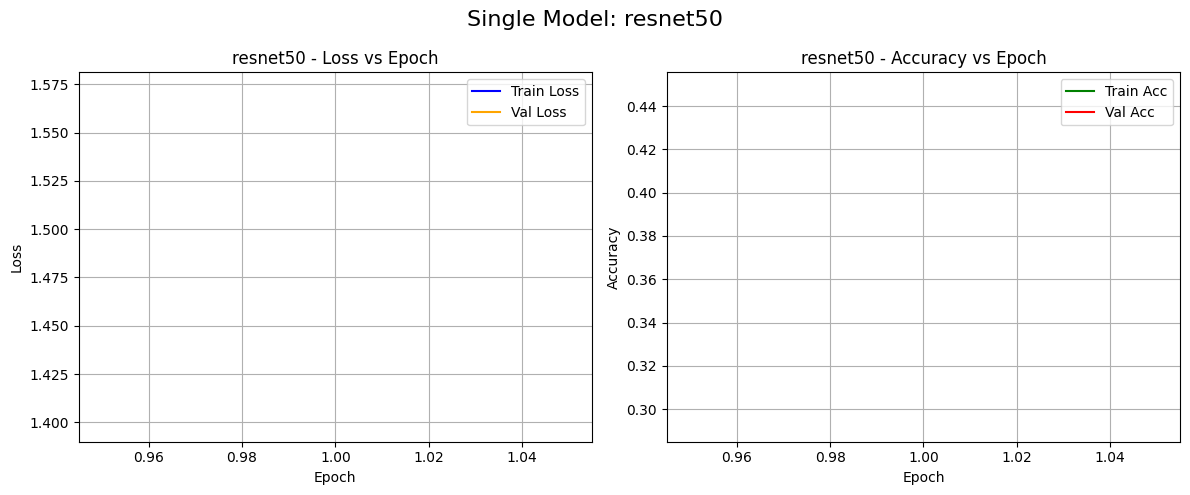

Training history plot saved: ./fish_classification_results/visualizations/resnet50_training_history.png
Plotting history for efficientnet_b0:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries
  val_f1: 1 entries


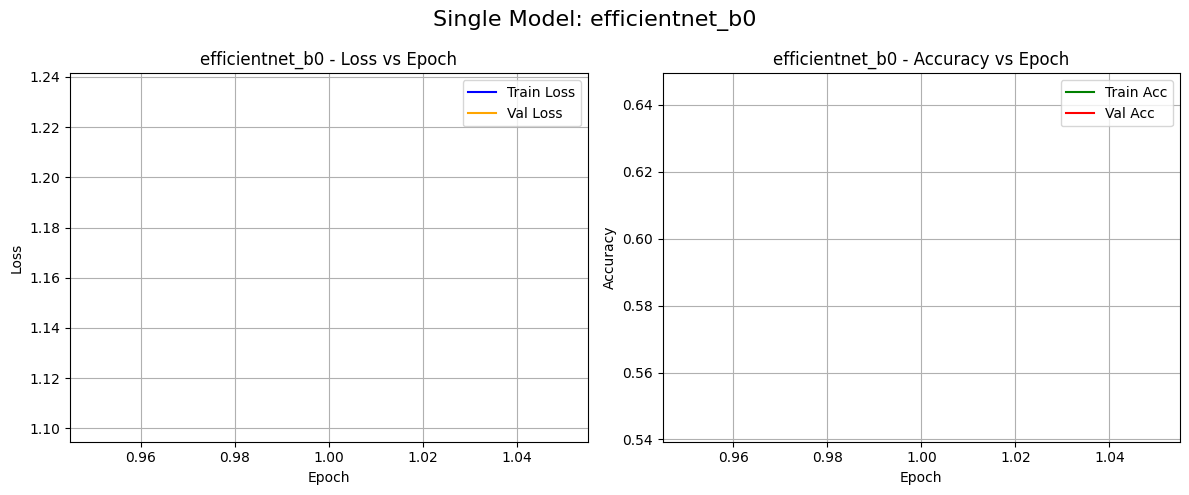

Training history plot saved: ./fish_classification_results/visualizations/efficientnet_b0_training_history.png
Plotting history for mobilenet_v3_large:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries
  val_f1: 1 entries


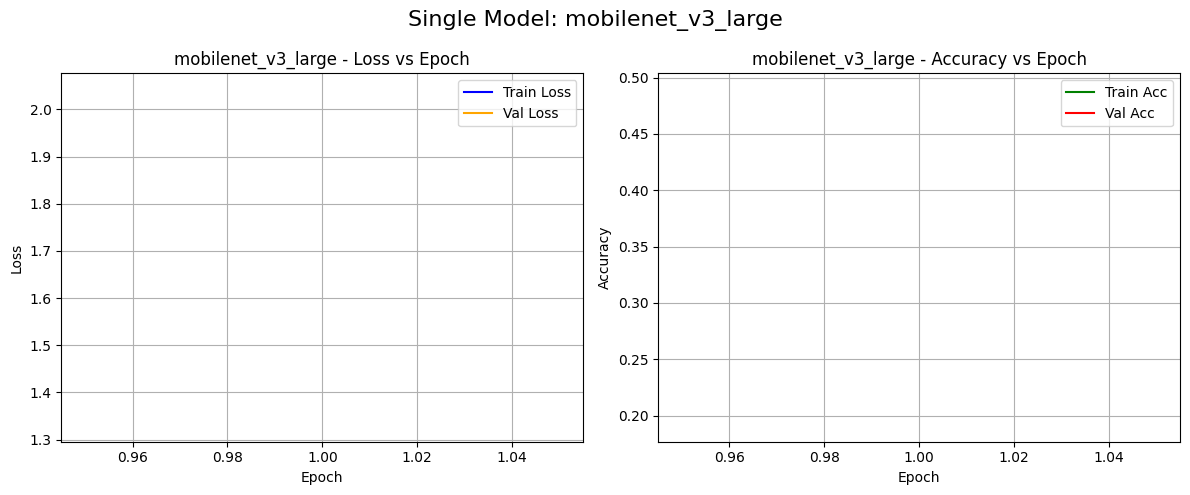

Training history plot saved: ./fish_classification_results/visualizations/mobilenet_v3_large_training_history.png
Plotting history for vgg16:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries
  val_f1: 1 entries


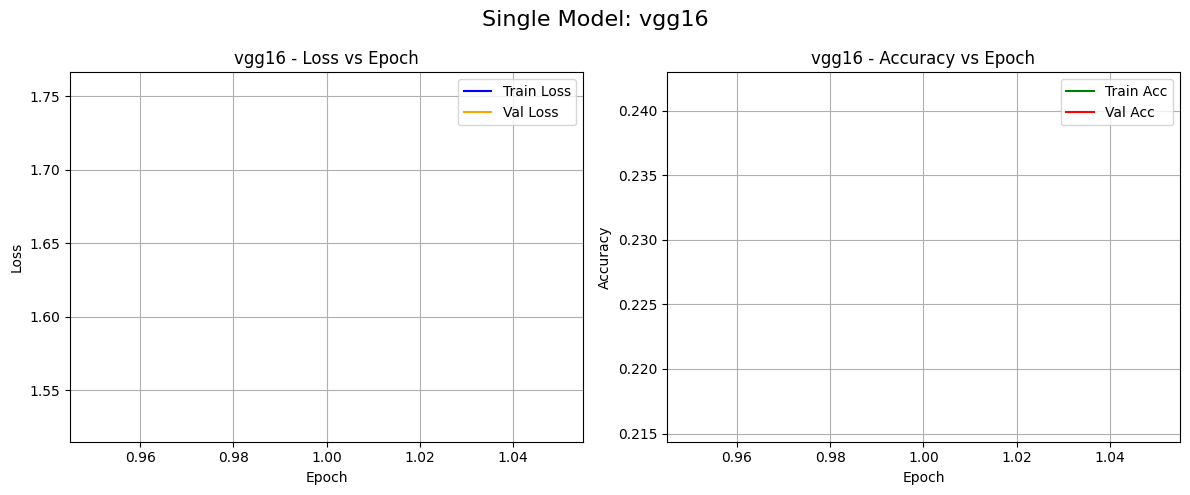

Training history plot saved: ./fish_classification_results/visualizations/vgg16_training_history.png
Plotting history for densenet121:
  train_loss: 1 entries
  train_acc: 1 entries
  val_loss: 1 entries
  val_acc: 1 entries
  val_f1: 1 entries


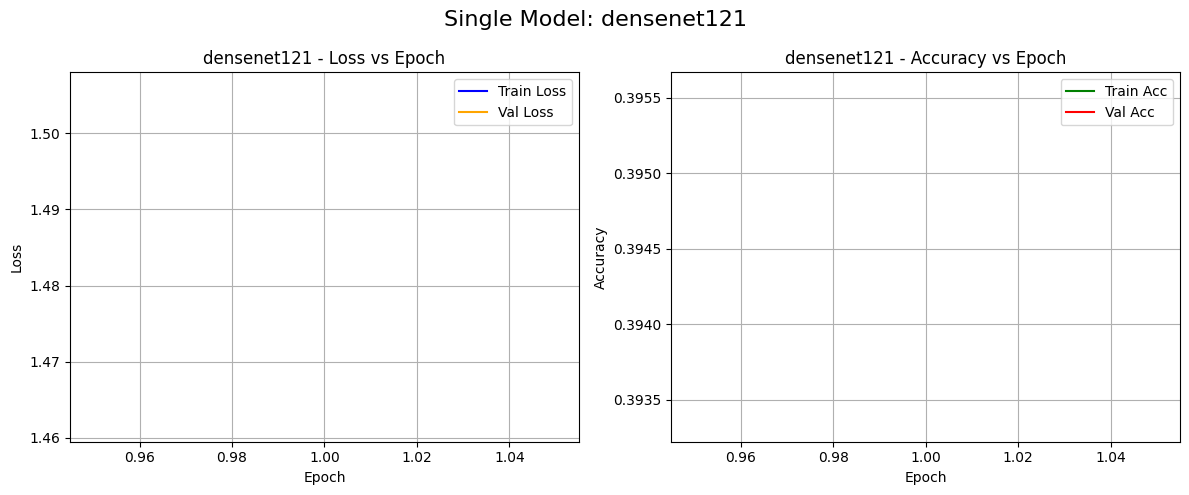

Training history plot saved: ./fish_classification_results/visualizations/densenet121_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


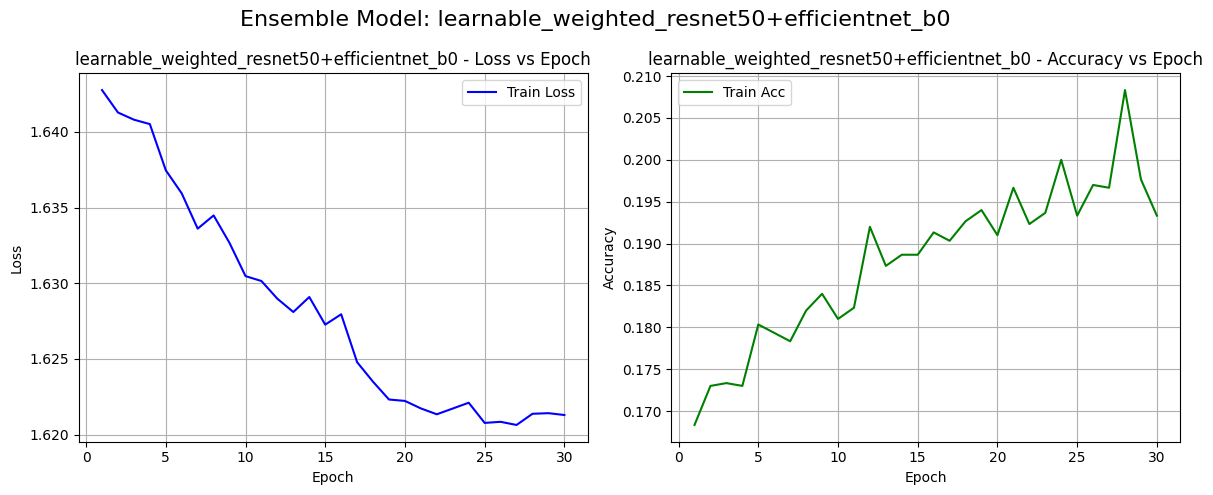

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0_training_history.png
Plotting history for learnable_weighted_resnet50+mobilenet_v3_large:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


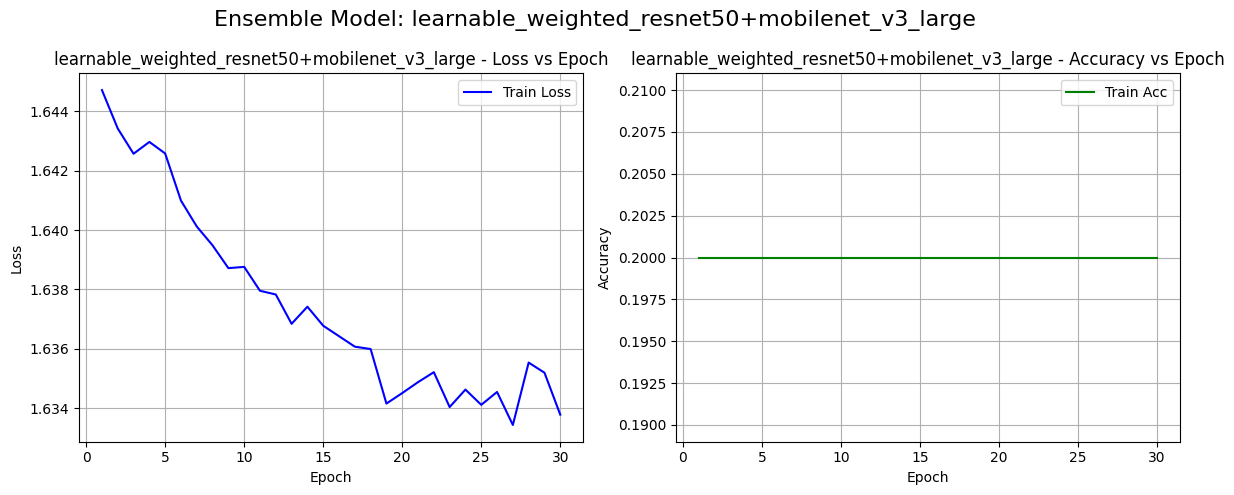

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+mobilenet_v3_large_training_history.png
Plotting history for learnable_weighted_resnet50+vgg16:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


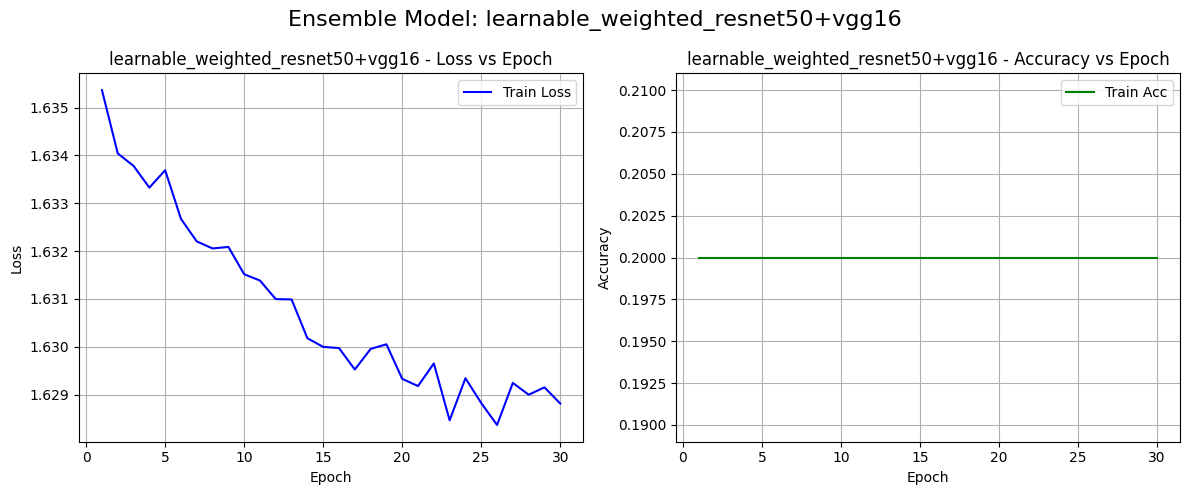

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+vgg16_training_history.png
Plotting history for learnable_weighted_resnet50+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


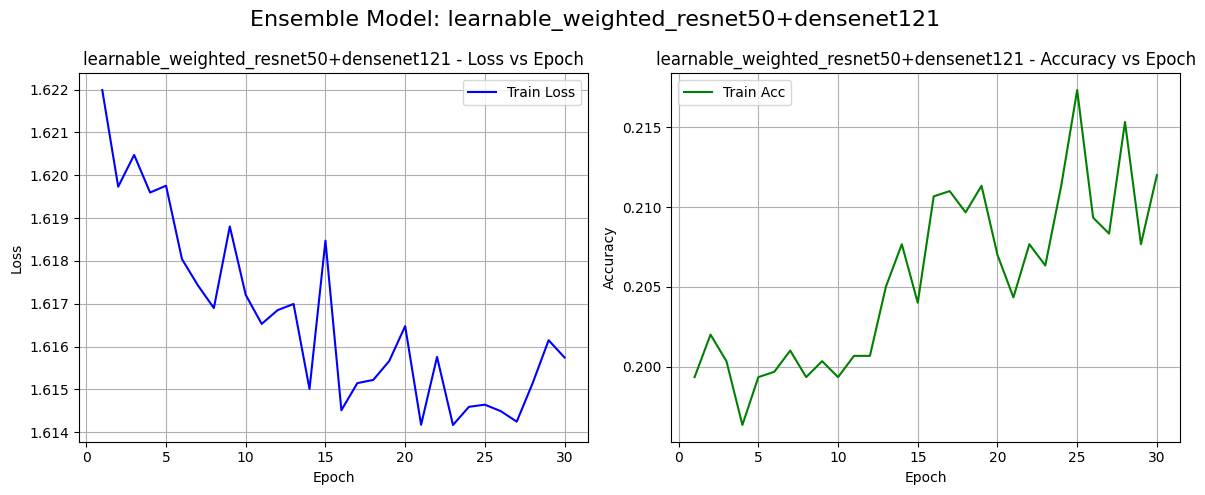

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+densenet121_training_history.png
Plotting history for learnable_weighted_efficientnet_b0+mobilenet_v3_large:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


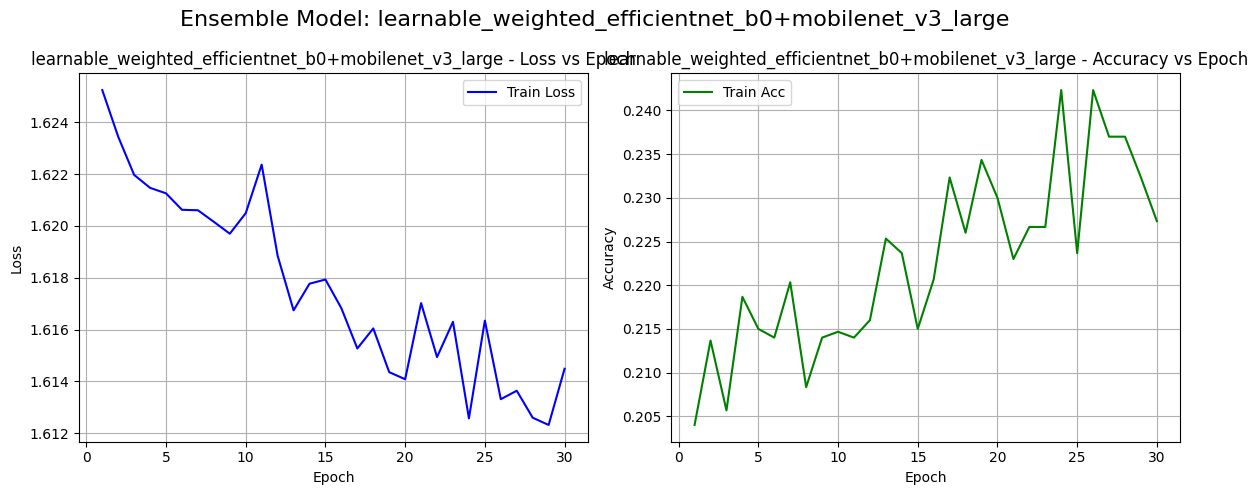

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_efficientnet_b0+mobilenet_v3_large_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


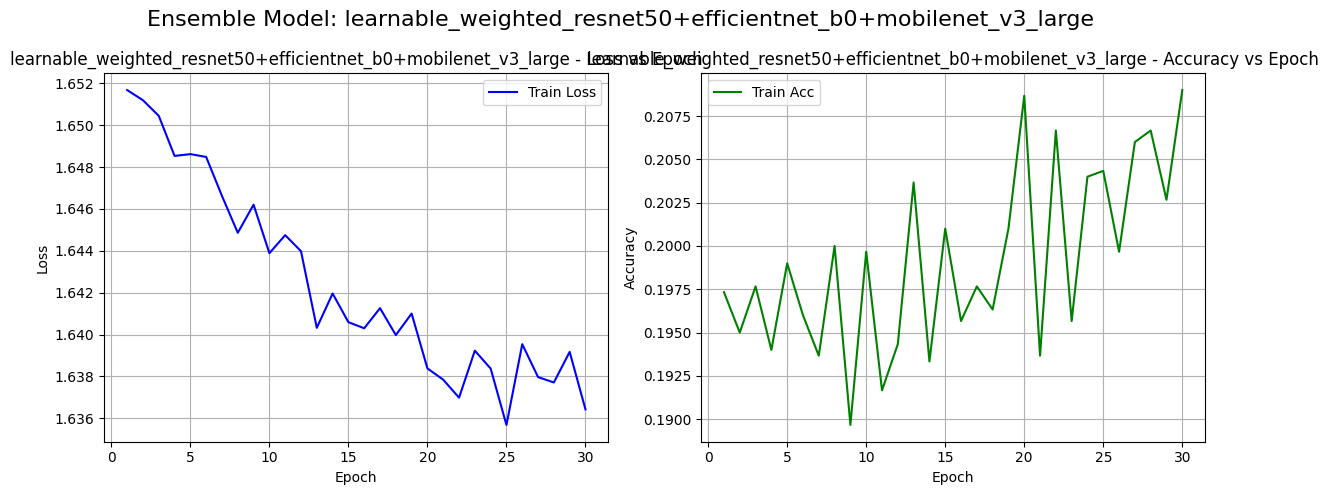

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+vgg16:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


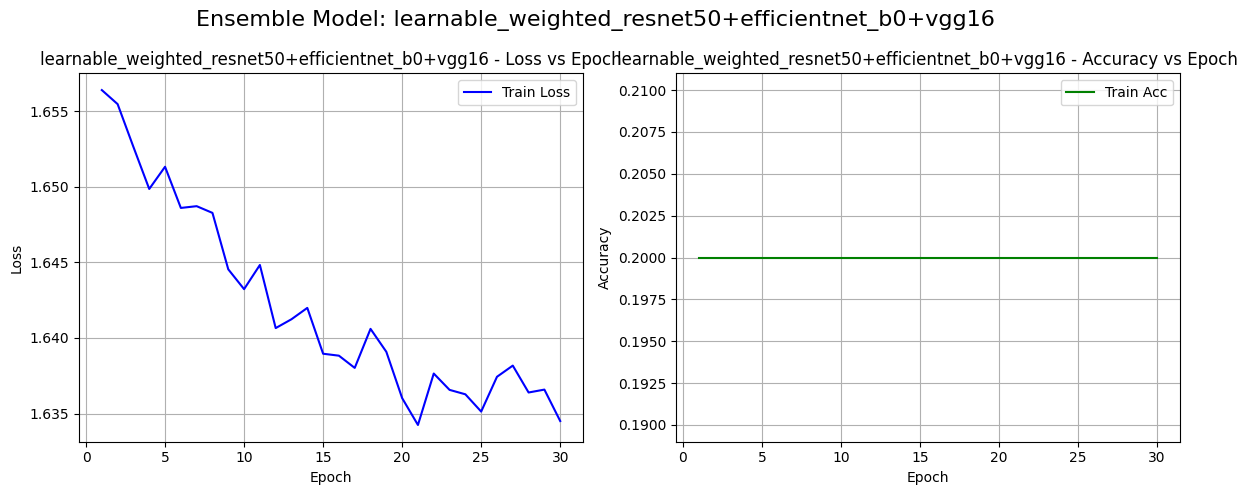

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+vgg16_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


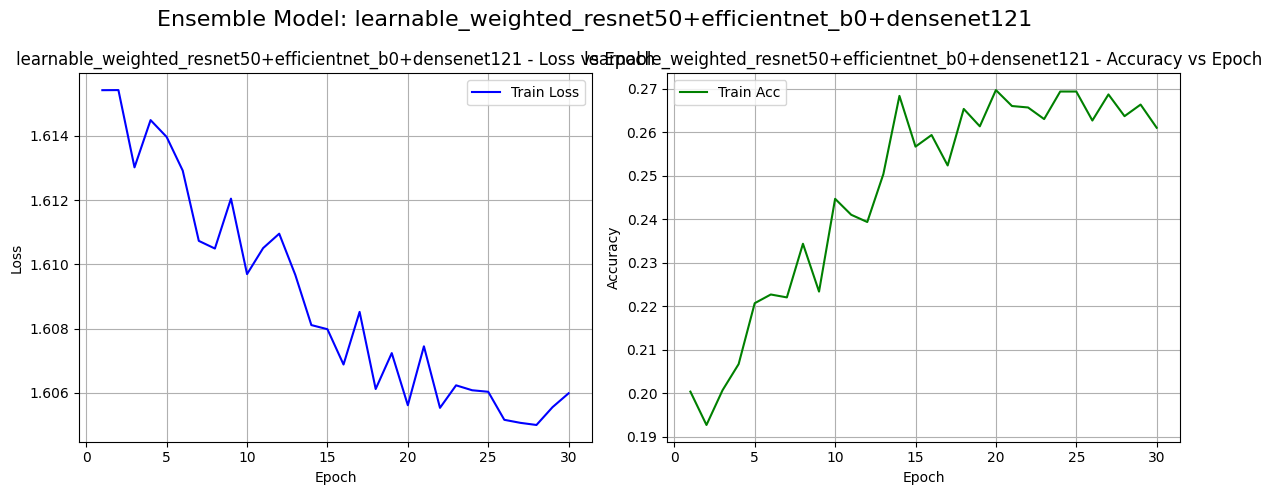

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+densenet121_training_history.png
Plotting history for learnable_weighted_resnet50+mobilenet_v3_large+vgg16:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


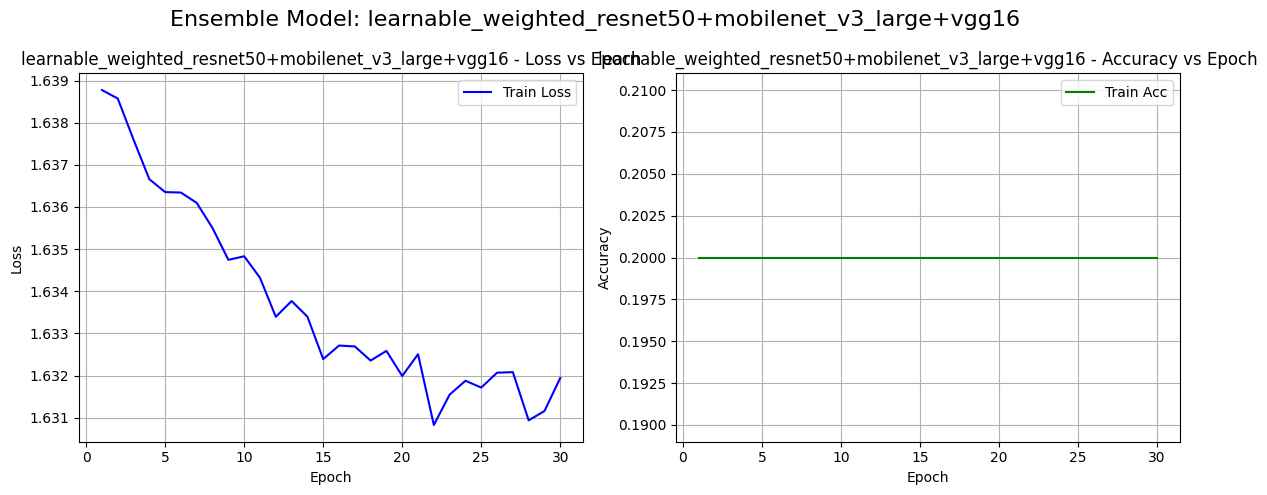

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+mobilenet_v3_large+vgg16_training_history.png
Plotting history for learnable_weighted_resnet50+mobilenet_v3_large+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


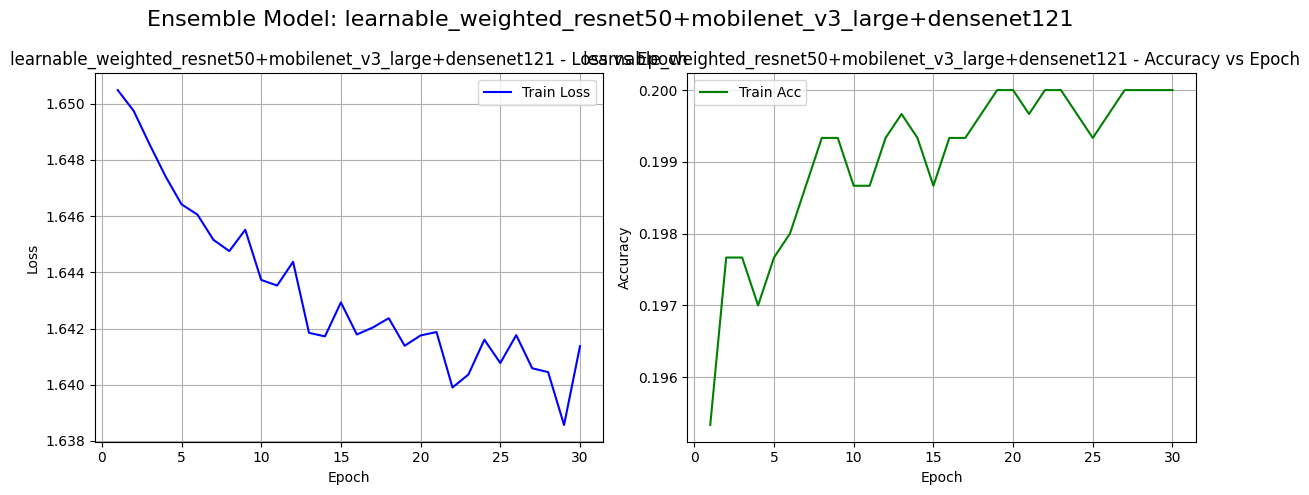

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+mobilenet_v3_large+densenet121_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large+vgg16:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


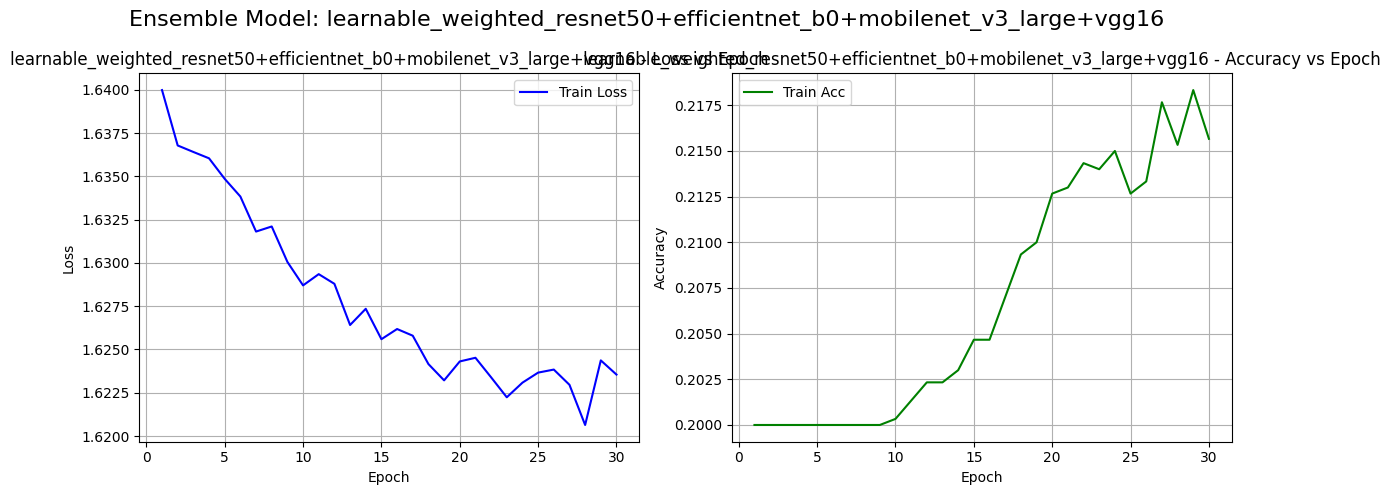

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large+vgg16_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


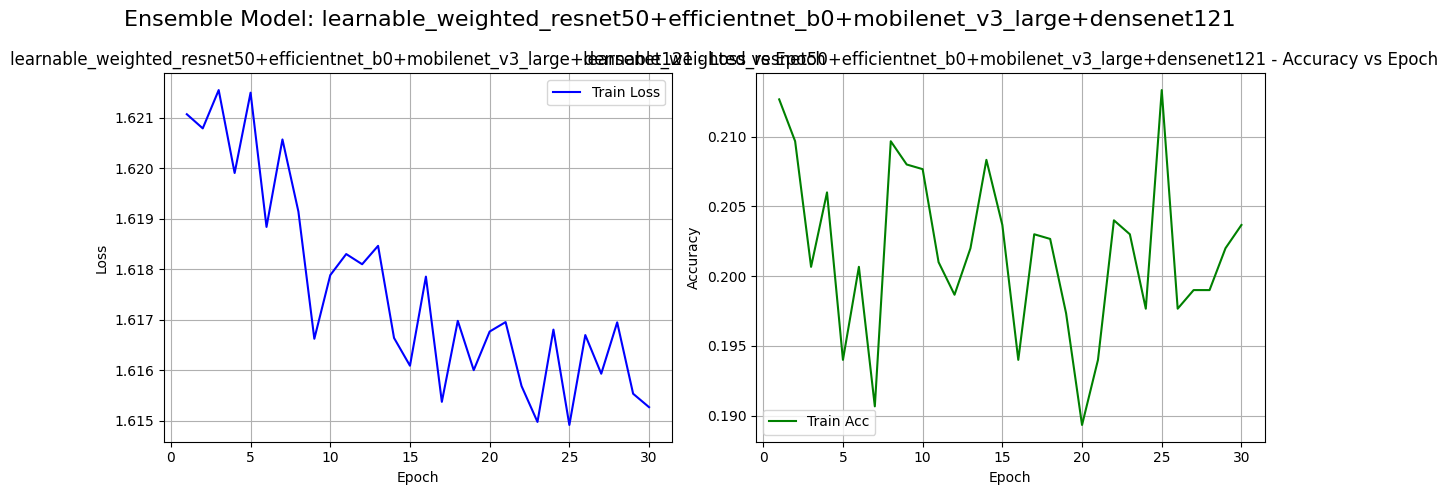

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+mobilenet_v3_large+densenet121_training_history.png
Plotting history for learnable_weighted_resnet50+efficientnet_b0+vgg16+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


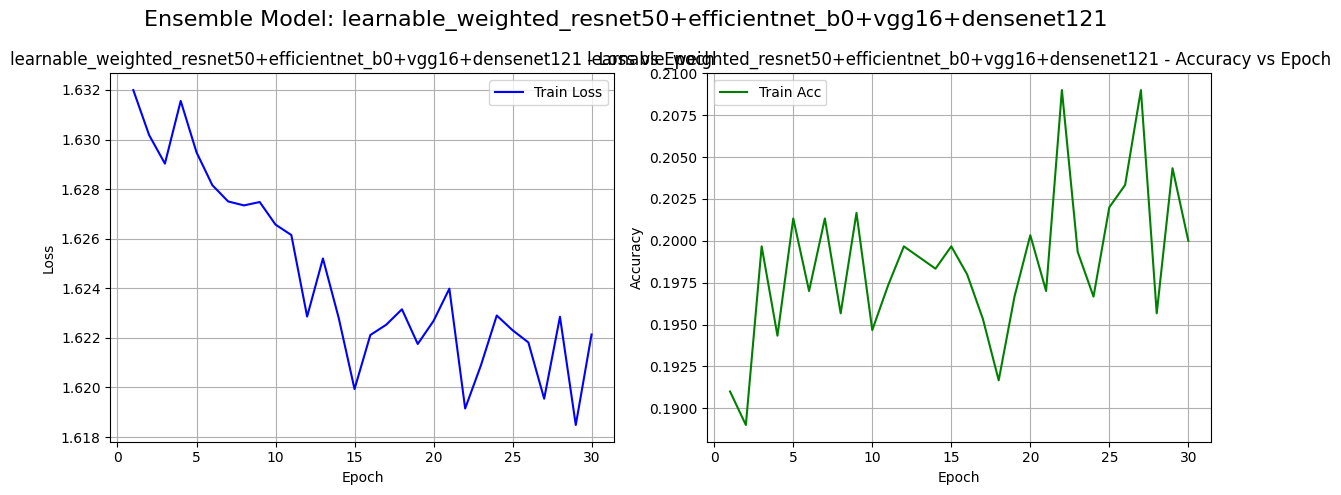

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+efficientnet_b0+vgg16+densenet121_training_history.png
Plotting history for learnable_weighted_resnet50+mobilenet_v3_large+vgg16+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


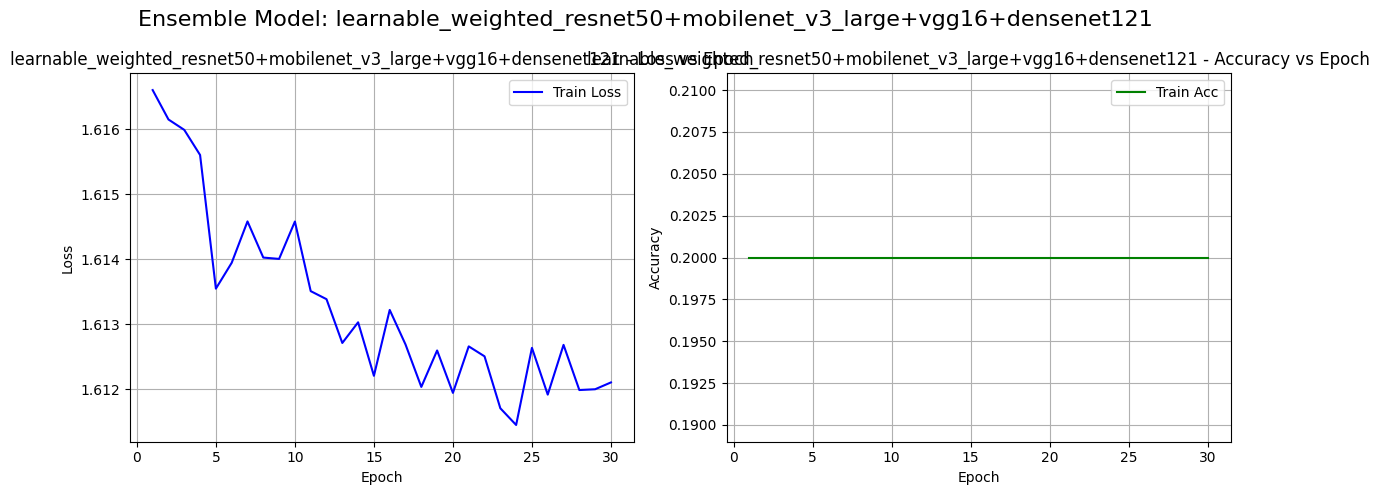

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_resnet50+mobilenet_v3_large+vgg16+densenet121_training_history.png
Plotting history for learnable_weighted_efficientnet_b0+mobilenet_v3_large+vgg16+densenet121:
  train_loss: 30 entries
  train_acc: 30 entries
  val_loss: 0 entries
  val_acc: 0 entries
  val_f1: 30 entries


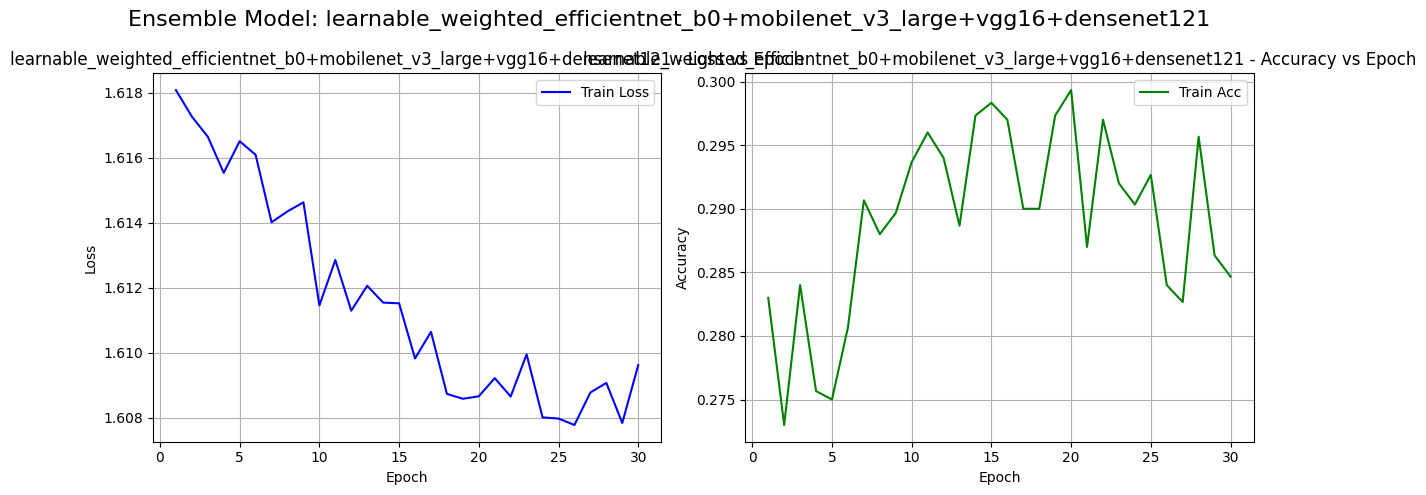

Training history plot saved: ./fish_classification_results/visualizations/learnable_weighted_efficientnet_b0+mobilenet_v3_large+vgg16+densenet121_training_history.png


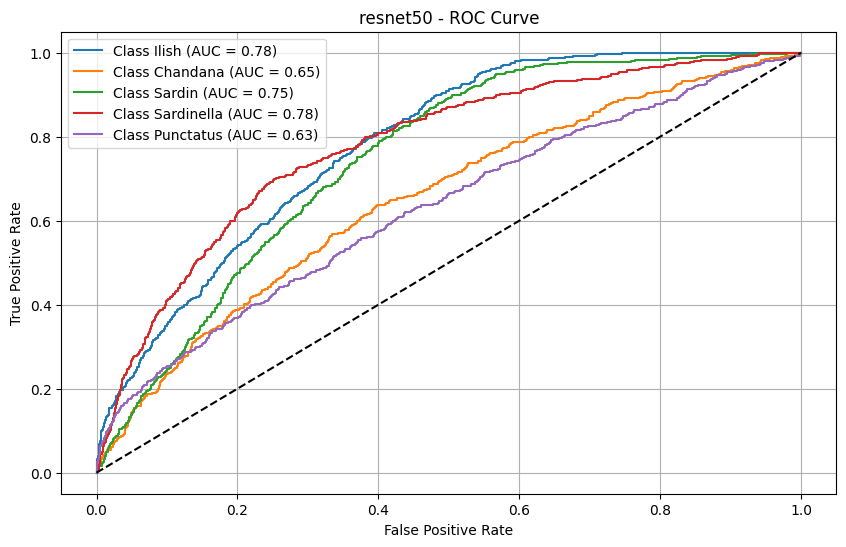

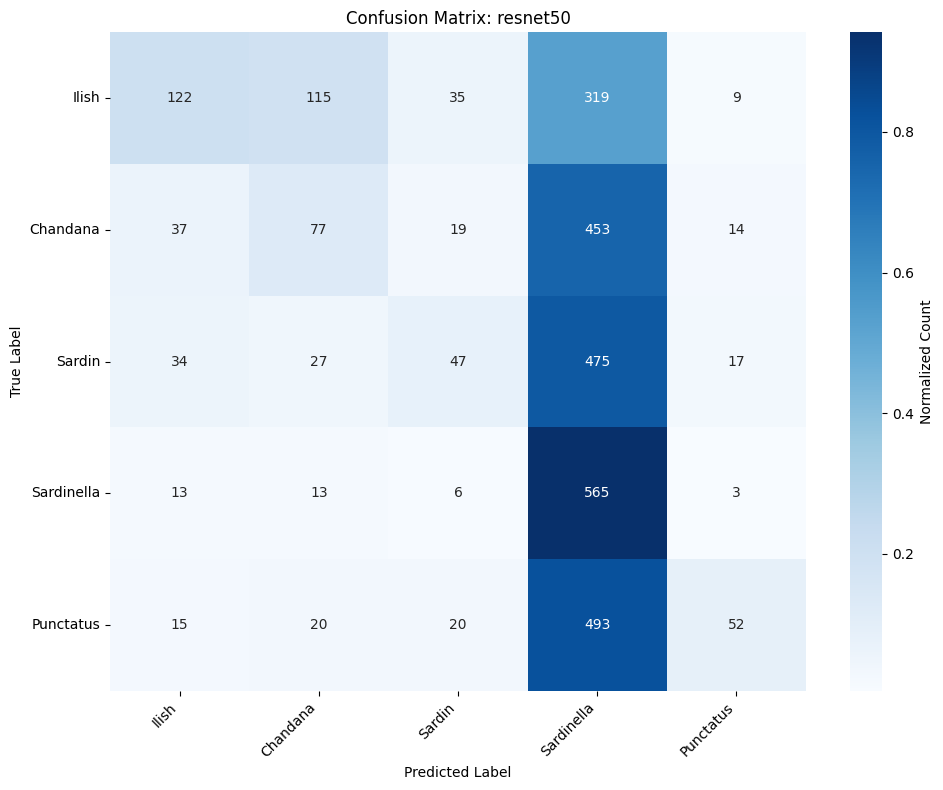

Confusion matrix saved: ./fish_classification_results/visualizations/resnet50_confusion_matrix.png


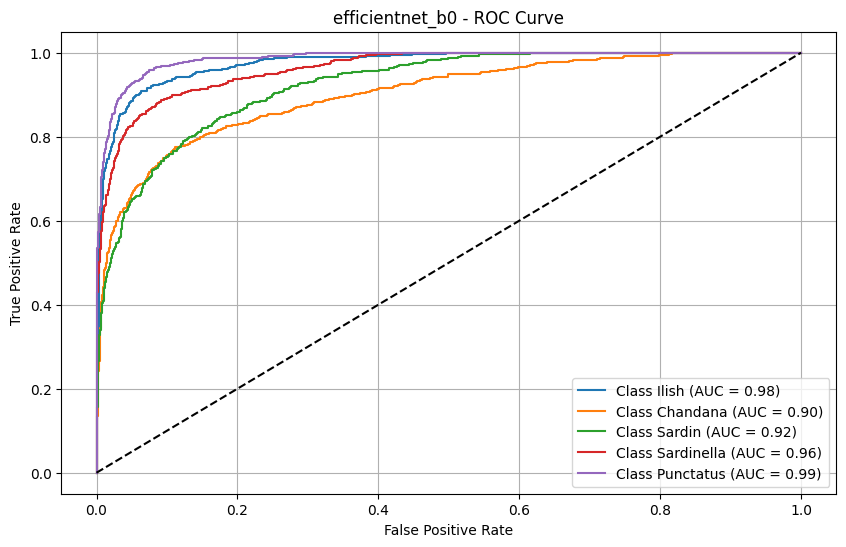

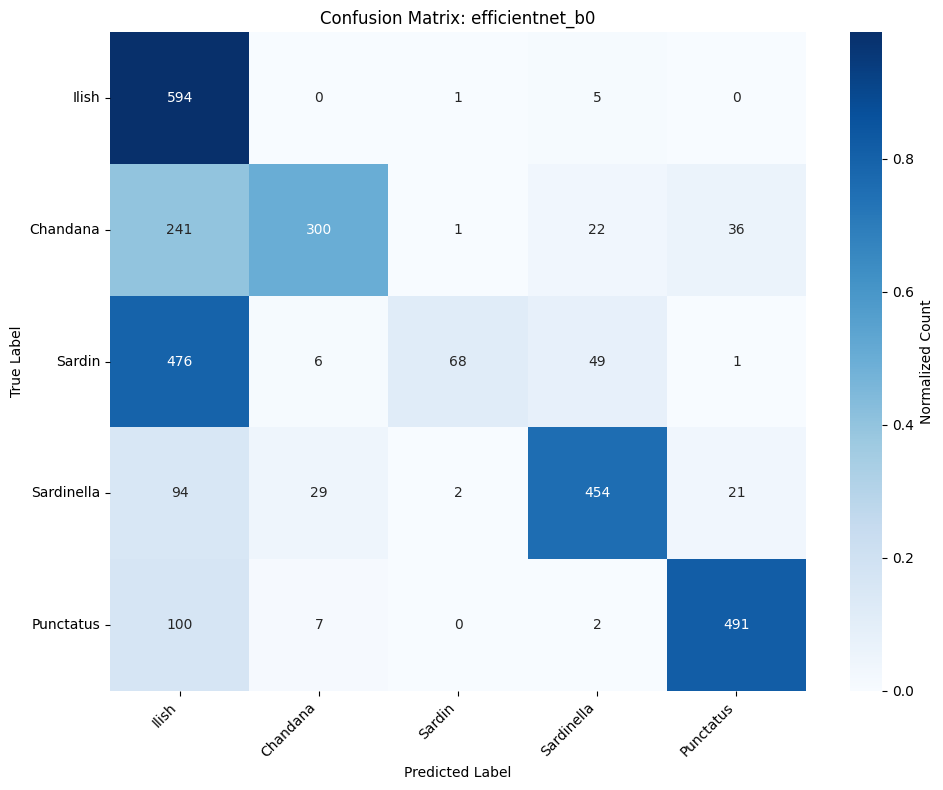

Confusion matrix saved: ./fish_classification_results/visualizations/efficientnet_b0_confusion_matrix.png


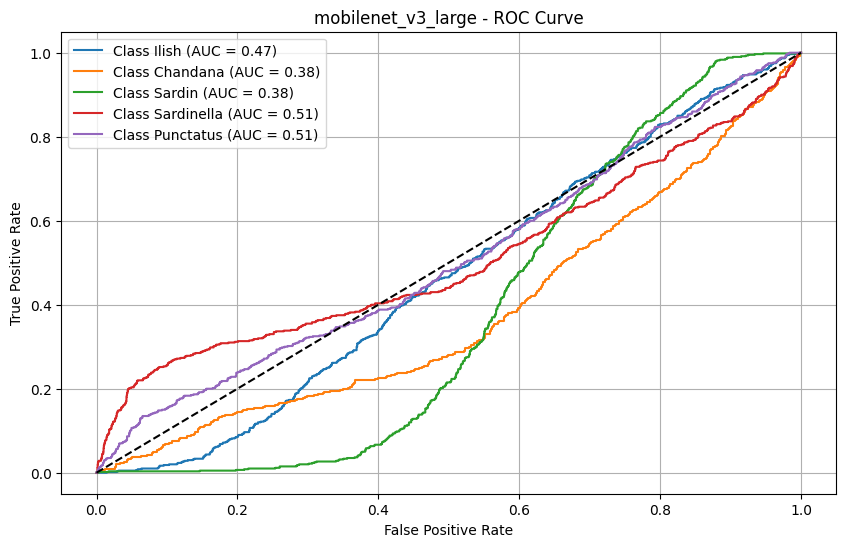

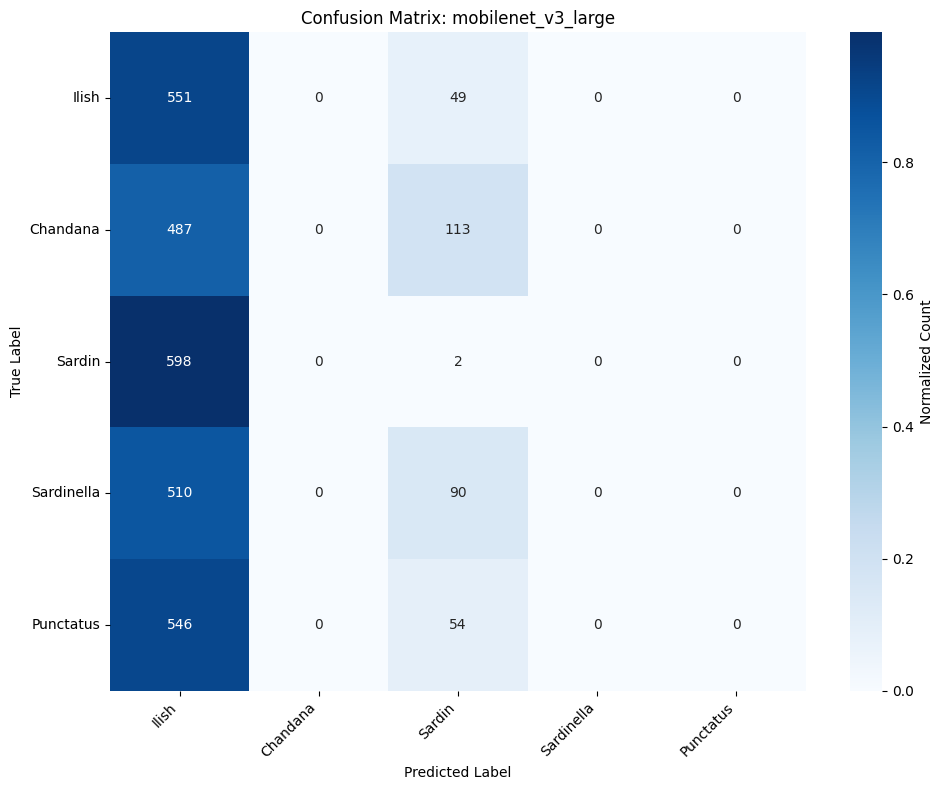

Confusion matrix saved: ./fish_classification_results/visualizations/mobilenet_v3_large_confusion_matrix.png


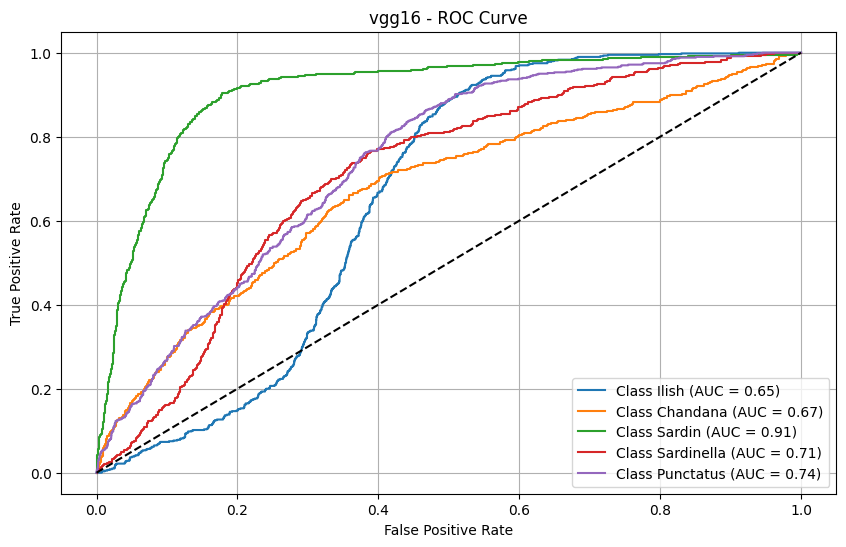

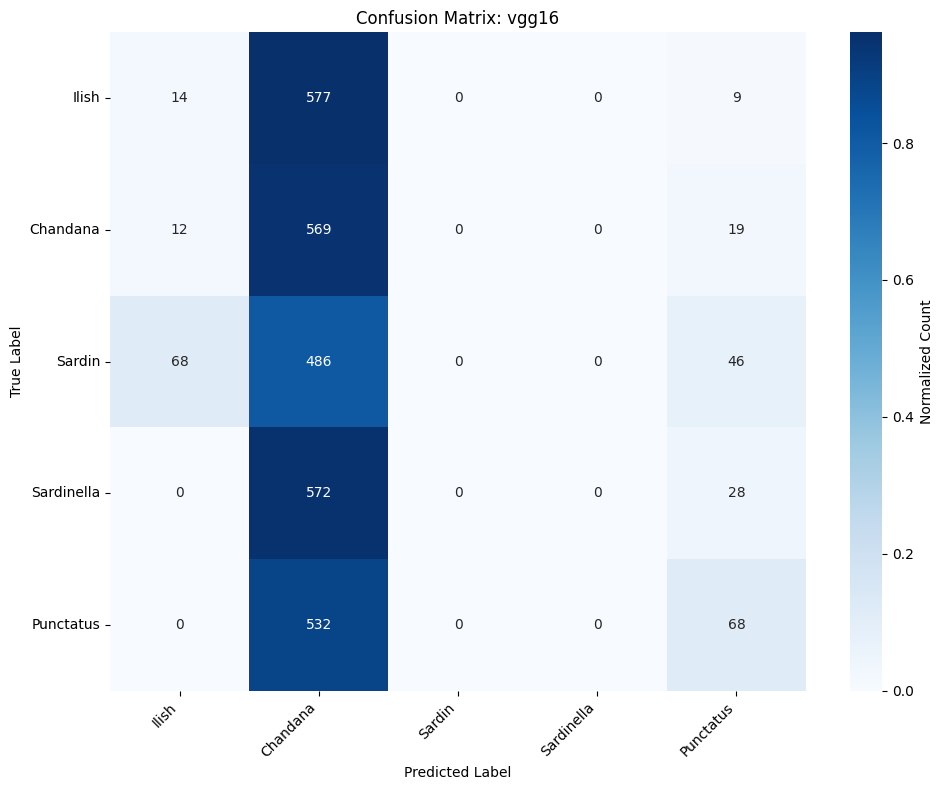

Confusion matrix saved: ./fish_classification_results/visualizations/vgg16_confusion_matrix.png


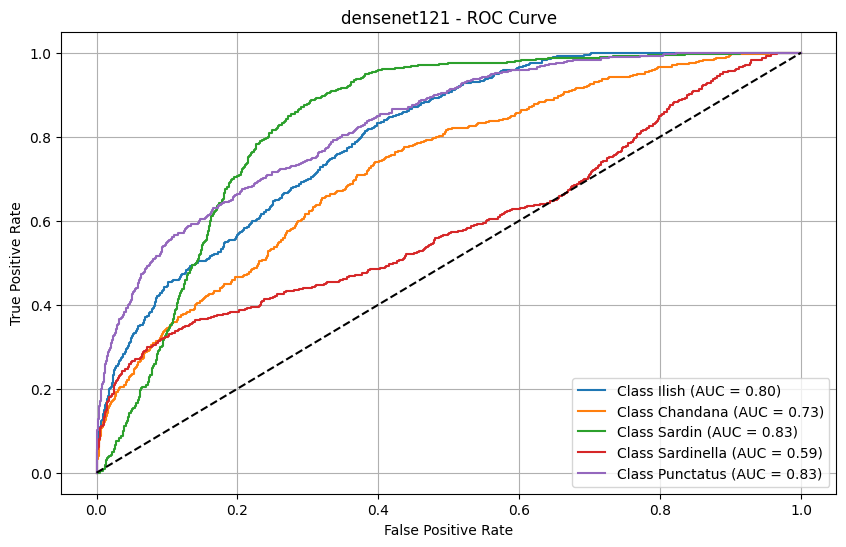

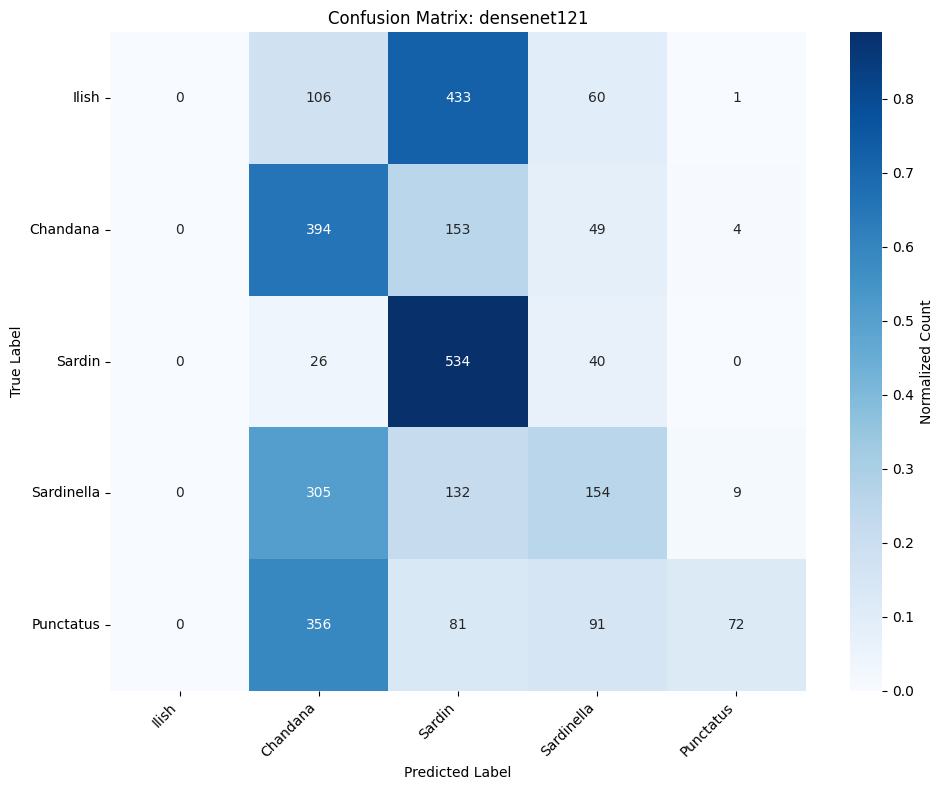

Confusion matrix saved: ./fish_classification_results/visualizations/densenet121_confusion_matrix.png


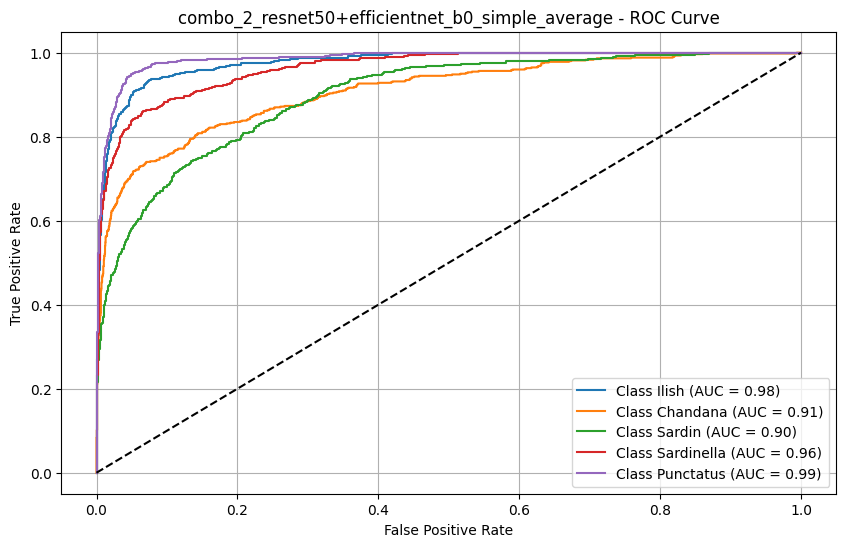

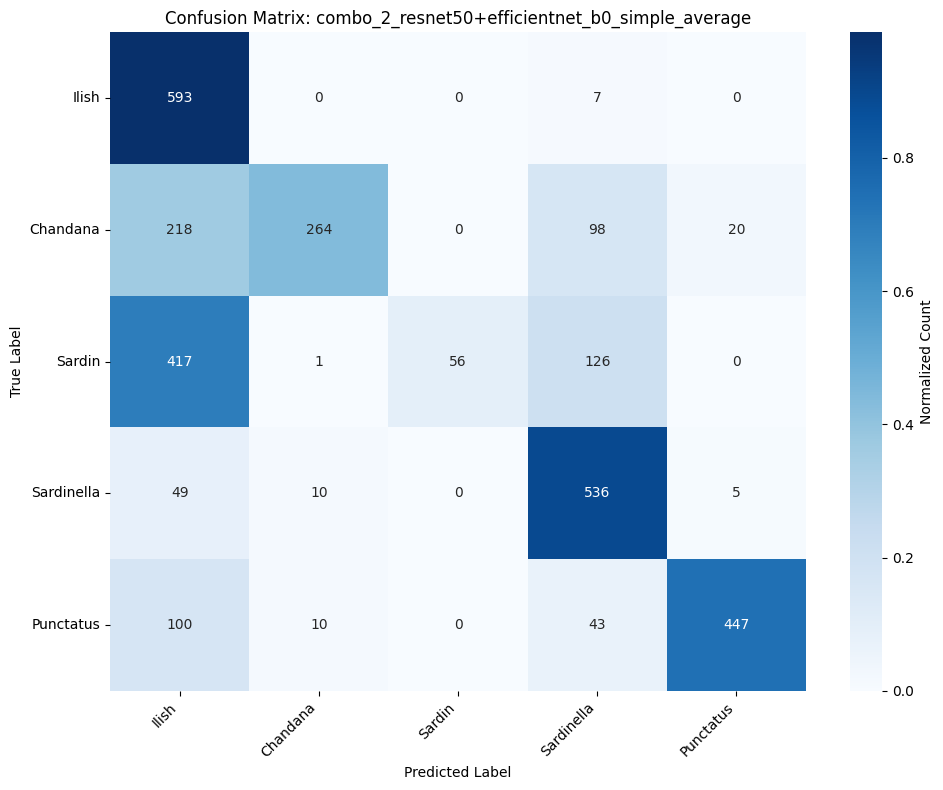

Confusion matrix saved: ./fish_classification_results/visualizations/combo_2_resnet50+efficientnet_b0_simple_average_confusion_matrix.png


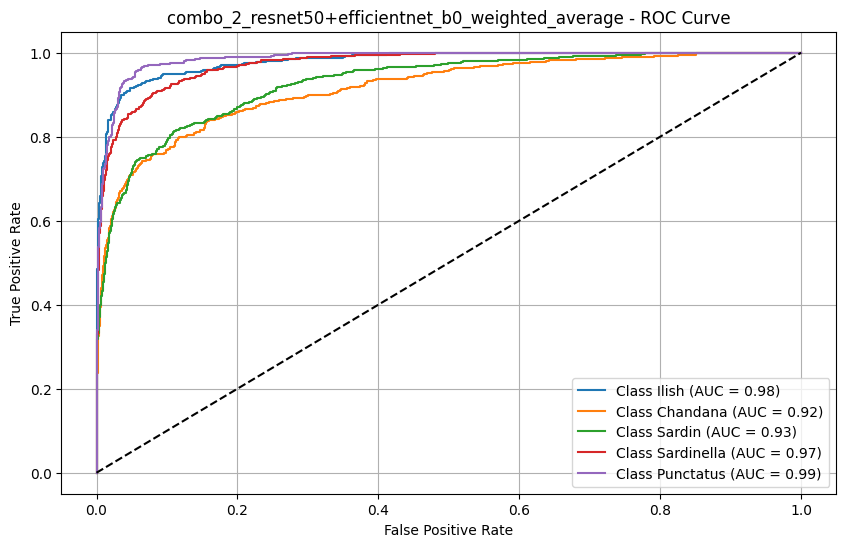

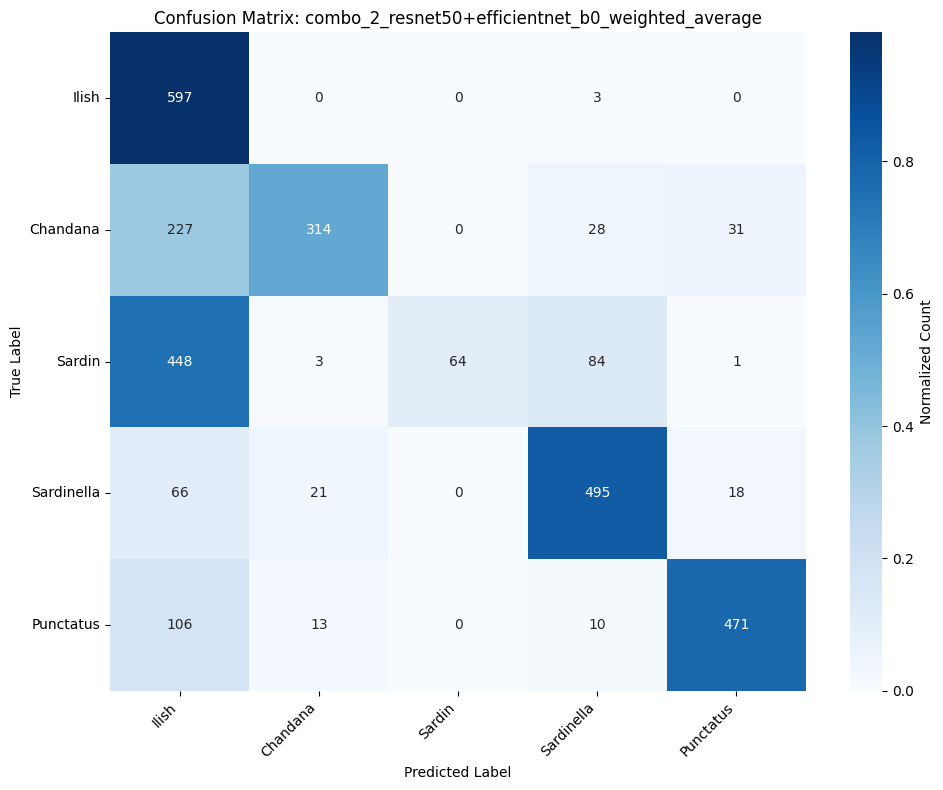

Confusion matrix saved: ./fish_classification_results/visualizations/combo_2_resnet50+efficientnet_b0_weighted_average_confusion_matrix.png


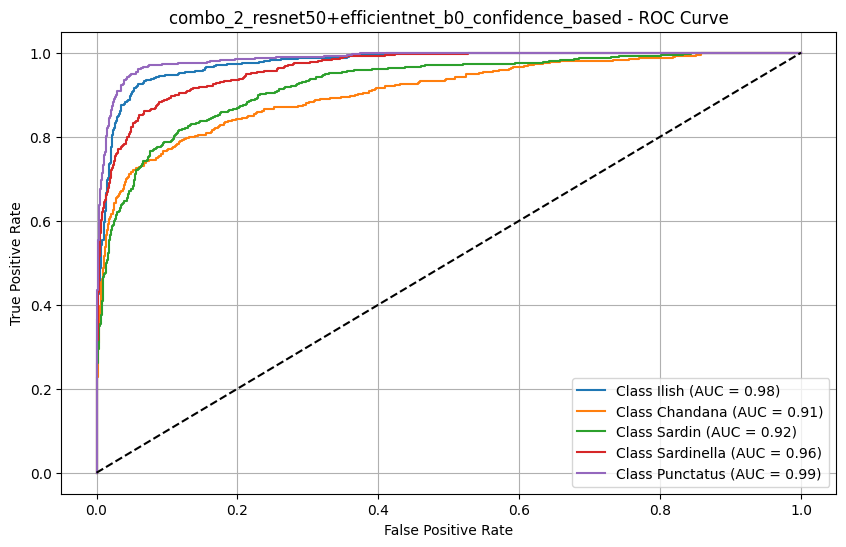

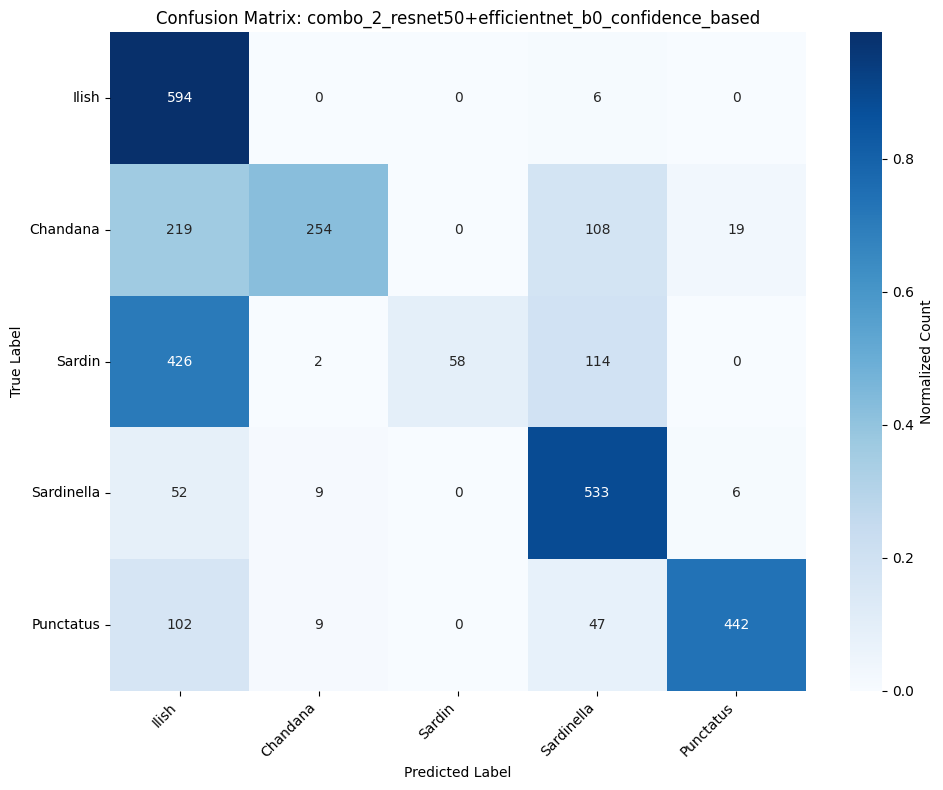

Confusion matrix saved: ./fish_classification_results/visualizations/combo_2_resnet50+efficientnet_b0_confidence_based_confusion_matrix.png


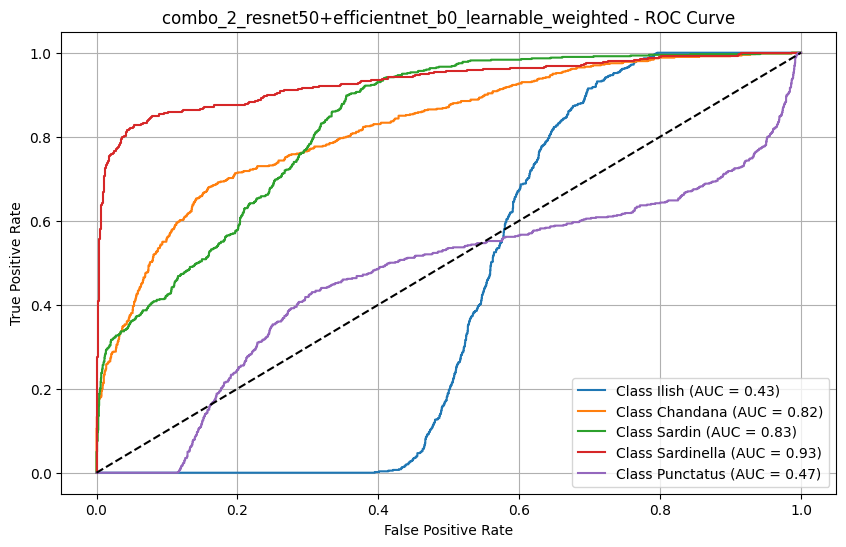

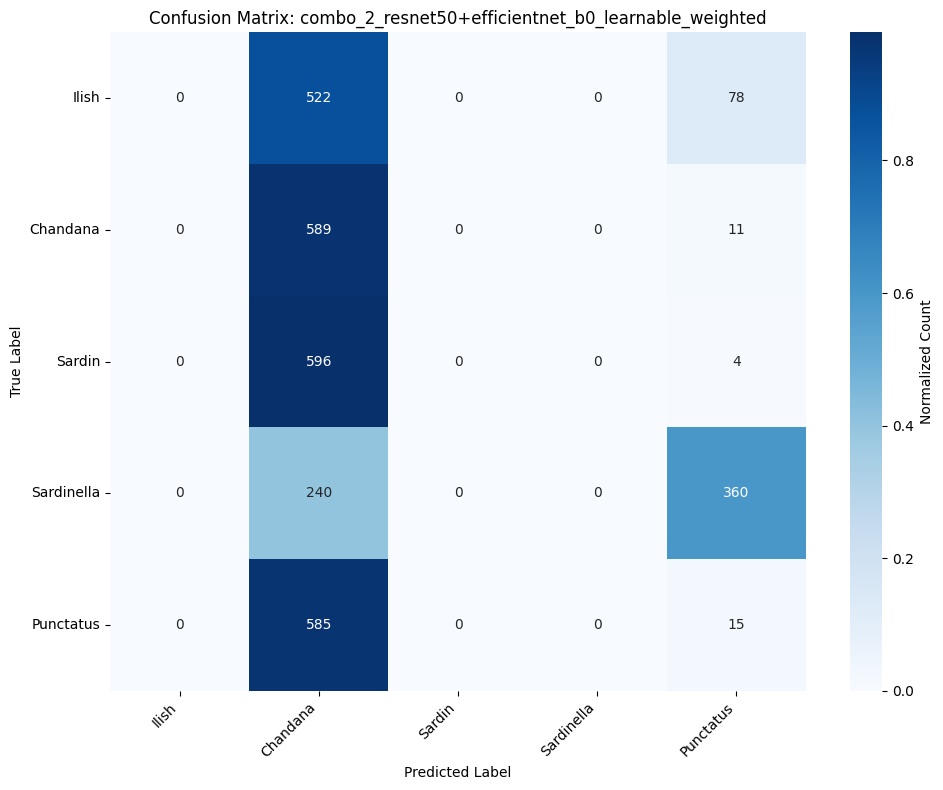

Confusion matrix saved: ./fish_classification_results/visualizations/combo_2_resnet50+efficientnet_b0_learnable_weighted_confusion_matrix.png


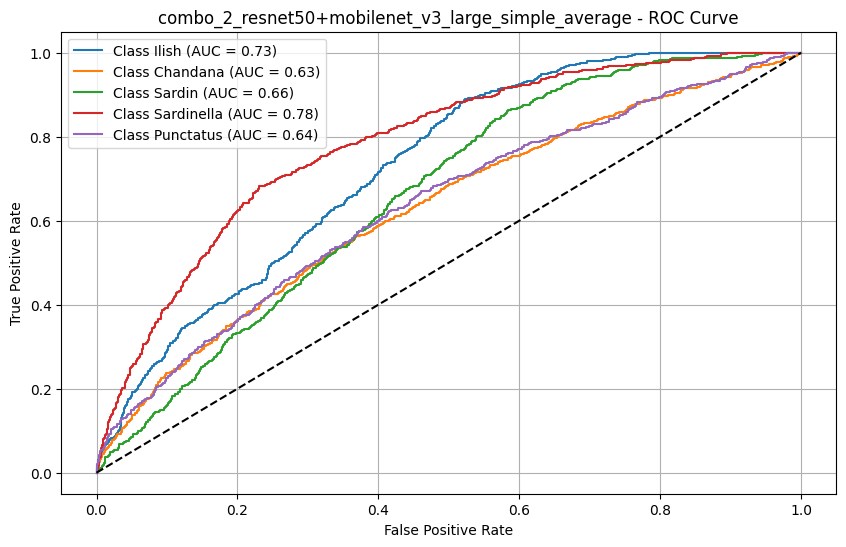

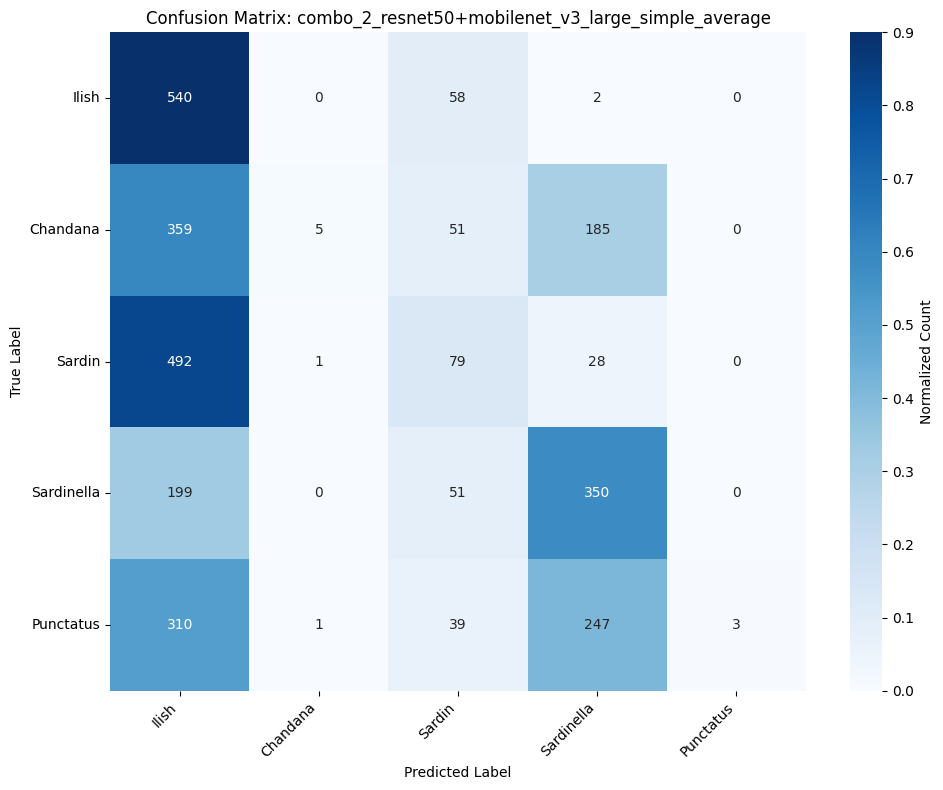

Confusion matrix saved: ./fish_classification_results/visualizations/combo_2_resnet50+mobilenet_v3_large_simple_average_confusion_matrix.png


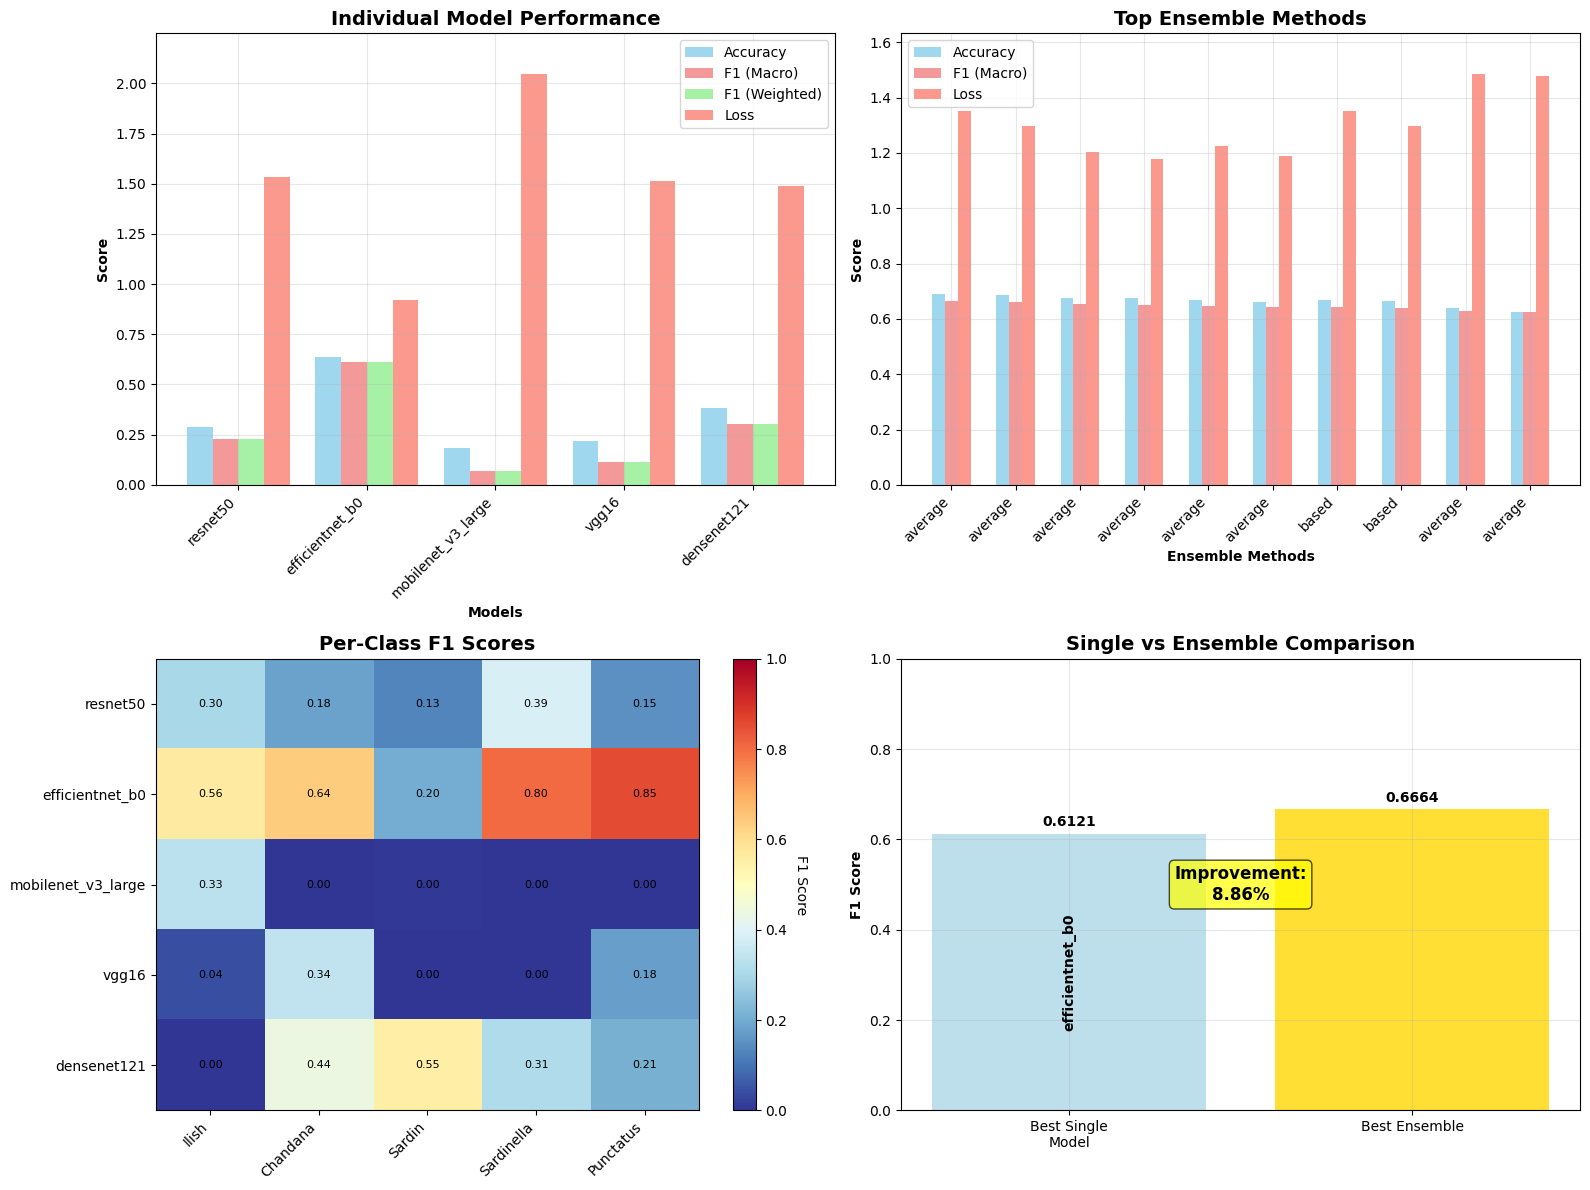

Model comparison saved: ./fish_classification_results/visualizations/model_comparison.png
Report generated: ./fish_classification_results/reports/experiment_report.json
Summary saved: ./fish_classification_results/reports/experiment_summary.txt


In [36]:


# =============================================================================
# MAIN EXECUTION
# =============================================================================

def main():
    setup_environment()

    X, Y = DataManager.load_and_balance_data()
    train_loader, val_loader, test_loader, val_data, test_data = DataManager.create_data_loaders(X, Y)

    models_dict = {}
    single_results = {}
    hyperparameter_results = {}
    training_histories = {}

    for model_name in Config.MODELS:
        print(f"\n{'='*70}")
        print(f"Processing model: {model_name.upper()}")
        print(f"{'='*70}")

        optimizer = ExpandedHyperparameterOptimizer(model_name, train_loader, val_loader)
        best_params = optimizer.optimize()
        hyperparameter_results[model_name] = best_params

        model = ModelFactory.create_model(
            model_name,
            dropout_rate=best_params.get('dropout', 0.5),
            hidden_dim_multiplier=best_params.get('hidden_dim_multiplier', 0.5)
        )

        trainer = EnhancedModelTrainer(model, model_name, best_params)
        history = trainer.train(train_loader, val_loader)

        models_dict[model_name] = trainer.model
        models_dict[model_name].f1_score = trainer.best_val_f1
        training_histories[model_name] = history

        evaluator = ModelEvaluator()
        results = evaluator.evaluate_model(trainer.model, test_loader, model_name)
        single_results[model_name] = results

    ensemble_manager = EnsembleManager(models_dict, val_data)
    ensemble_results, best_ensemble = ensemble_manager.test_ensemble_combinations()

    visualizer = EnhancedVisualizations()
    for model_name, history in training_histories.items():
        visualizer.plot_training_history({model_name: history}, model_type='single')
    for model_name, history in ensemble_manager.histories.items():
        visualizer.plot_training_history({model_name: history}, model_type='ensemble')

    for model_name in single_results:
        visualizer.plot_roc_curves(single_results[model_name], model_name)
        visualizer.plot_confusion_matrix(single_results[model_name], model_name)

    for ensemble_name in list(ensemble_results.keys())[:5]:
        visualizer.plot_roc_curves(ensemble_results[ensemble_name], ensemble_name)
        visualizer.plot_confusion_matrix(ensemble_results[ensemble_name], ensemble_name)

    visualizer.plot_model_comparison(single_results, ensemble_results)

    report_generator = ComprehensiveReportGenerator(Config.OUTPUT_DIR)
    report = report_generator.generate_detailed_report(
        single_results, ensemble_results, hyperparameter_results,
        training_histories, ensemble_manager.histories
    )

    if best_ensemble:
        best_ensemble_tester = EnsembleRealWorldTester(
            models_dict,
            best_ensemble[0].split('_')[-1],
            best_ensemble[1]['models'],
            best_ensemble[1].get('learned_weights')
        )
        # Example usage: test_image_path = "path_to_test_image.jpg"
        # best_ensemble_tester.test_image(test_image_path)

    return single_results, ensemble_results, report

if __name__ == "__main__":
    single_results, ensemble_results, report = main()


#End